# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


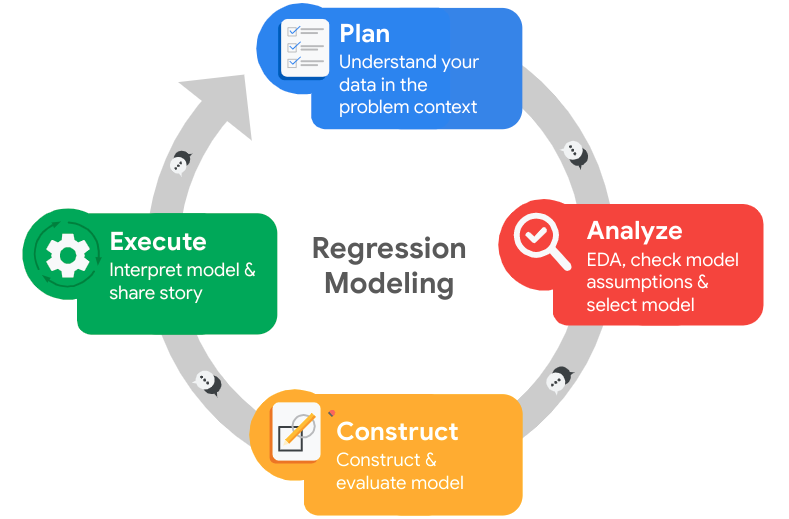

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
    *  Salifort Motors are the primary stakeholders in that the results from this analysis will give them opportunities for action.
    *  The employees of the company are also important stakeholders as this analysis may have an impact on their employment and livelihood.
- What are you trying to solve or accomplish?
    - I am attempting to improve employee retention by creating a model that can predict if an employee will leave. This will allow the company to employ preemptive measures to prevent the loss of an employee.
- What are your initial observations when you explore the data?
    - Employees tend to spend 3 to 4 years at the company, however there are some very highly tenured employees as well.
    - Employees in this company, on average, work more hours per month than would be expected (a typical month has 176 business hours).
    - Some of the columns are typoed or dont follow snake_case.
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
    - Pandas doc page 
- Do you have any ethical considerations in this stage?
    - No 




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

import pickle

In [2]:
pd.options.mode.chained_assignment = None

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###


In [7]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={
    "Department":"department", 
    "Work_accident":"work_accident",
    "average_montly_hours" : "average_monthly_hours"
})

# Display all column names after the update
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
print(df0.shape)
df0[df0.duplicated(keep=False)].sort_values(by=df0.columns.to_list())

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
13586,1.00,0.93,5,167,3,0,0,0,sales,medium
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df_deduped = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(df_deduped[df_deduped.duplicated(keep=False)].size)
df_deduped.head(10)

0


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Distribution of Employee Tenure')

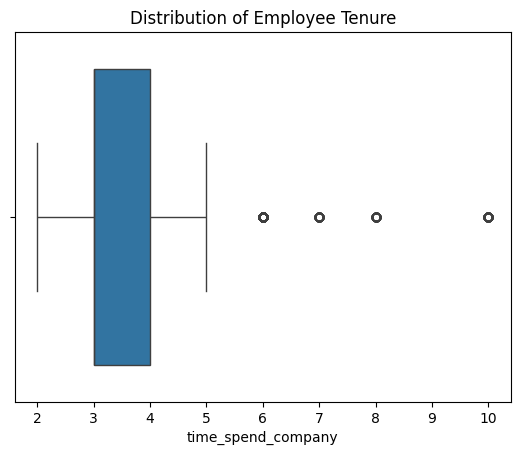

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(df_deduped["time_spend_company"], orient="h")
plt.title("Distribution of Employee Tenure")


(1886, 10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,0.589952,0.763643,4.274655,212.410392,5.799576,0.157476,0.313362,0.028102
std,0.277990,0.178767,1.139065,51.194197,1.285760,0.364346,0.463983,0.165308
min,0.090000,0.360000,2.000000,97.000000,5.000000,0.000000,0.000000,0.000000
25%,0.310000,0.620000,4.000000,172.000000,5.000000,0.000000,0.000000,0.000000
50%,0.670000,0.810000,4.000000,225.000000,5.000000,0.000000,0.000000,0.000000
75%,0.830000,0.910000,5.000000,254.000000,6.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


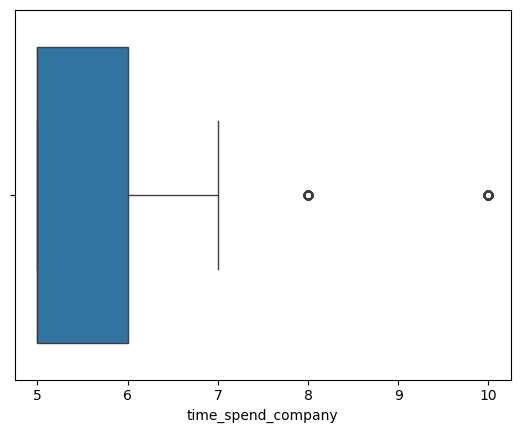

In [13]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
q1, q2, q3 = np.quantile(df_deduped["time_spend_company"], q=[0.25, 0.25, 0.75])
outlier_thresh = 1.5 * (q3 - q1)

outliers = df_deduped[(df_deduped["time_spend_company"] < q2 - outlier_thresh) | (df_deduped["time_spend_company"] > q2 + outlier_thresh)]

print(outliers.shape)
sns.boxplot(outliers["time_spend_company"], orient="h")
outliers.describe()

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
    - There don't seem to be distinct relationships between variables. It is unlikely any variable is collinear. 
- What do you observe about the distributions in the data?
    - The percent of employees who left make up only 16.6% of the data. This may be too small an amount without sampling adjustments. 
    - ```satisfaction_level```, ```last_evaluation``` and ```average_monthly_hours``` don't seem to be normal.
    - ```number_project``` and ```time_spend_company``` may be log-normal in their counts.
    - The rest are binary.
- What transformations did you make with your data? Why did you chose to make those decisions?
    - I added a ```satisfied``` column as a generalization of an employee's satisfaction level to see if employees who left are generally satisfied or not.
    - I added a ```evaluation``` column with similar reasoning to the ```satisfied``` addition.
    - I added a ```hard_worker``` column as a generalization of whether an employee worked above average hours compared to the rest of the company. This was added primarily as a visual abstraction.
    - I added a ```hours_per_project``` column to see if there was a relationship between employees who left and employees who work high hours on many projects.
    - I added a ```projects_per_year``` column to see if employees who left received many projects relative to their time in the company.
- What are some purposes of EDA before constructing a predictive model?
    - To determine if the dataset is representative.
    - To determine if the entries in the dataset are valid (whether logically or in terms of their values).
    - To figure out what variables might be more or less useful during model creation so as to improve accuracy or training time.
    - To determine if any new relationships can be created between variables that can help model accuracy.
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
    - Pandas, seaborn doc 
- Do you have any ethical considerations in this stage?
    - ```hard_worker``` is probably not going to be used for model production because it is a morally problematic assumption of character and is a relative value to the rest of the company anyway. The raw numeric values from which this is derived is likely to be more useful to the model than this binarization.




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print("Count of left")
print(df_deduped["left"].value_counts())

print()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print("Percentage of left")
print(df_deduped["left"].value_counts() / len(df_deduped))

print()

print("Outliers count of left")
print(outliers["left"].value_counts())

print()

print("Outliers percentage count of left")
print(outliers["left"].value_counts() / len(outliers))

Count of left
left
0    10000
1     1991
Name: count, dtype: int64

Percentage of left
left
0    0.833959
1    0.166041
Name: count, dtype: float64

Outliers count of left
left
0    1295
1     591
Name: count, dtype: int64

Outliers percentage count of left
left
0    0.686638
1    0.313362
Name: count, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

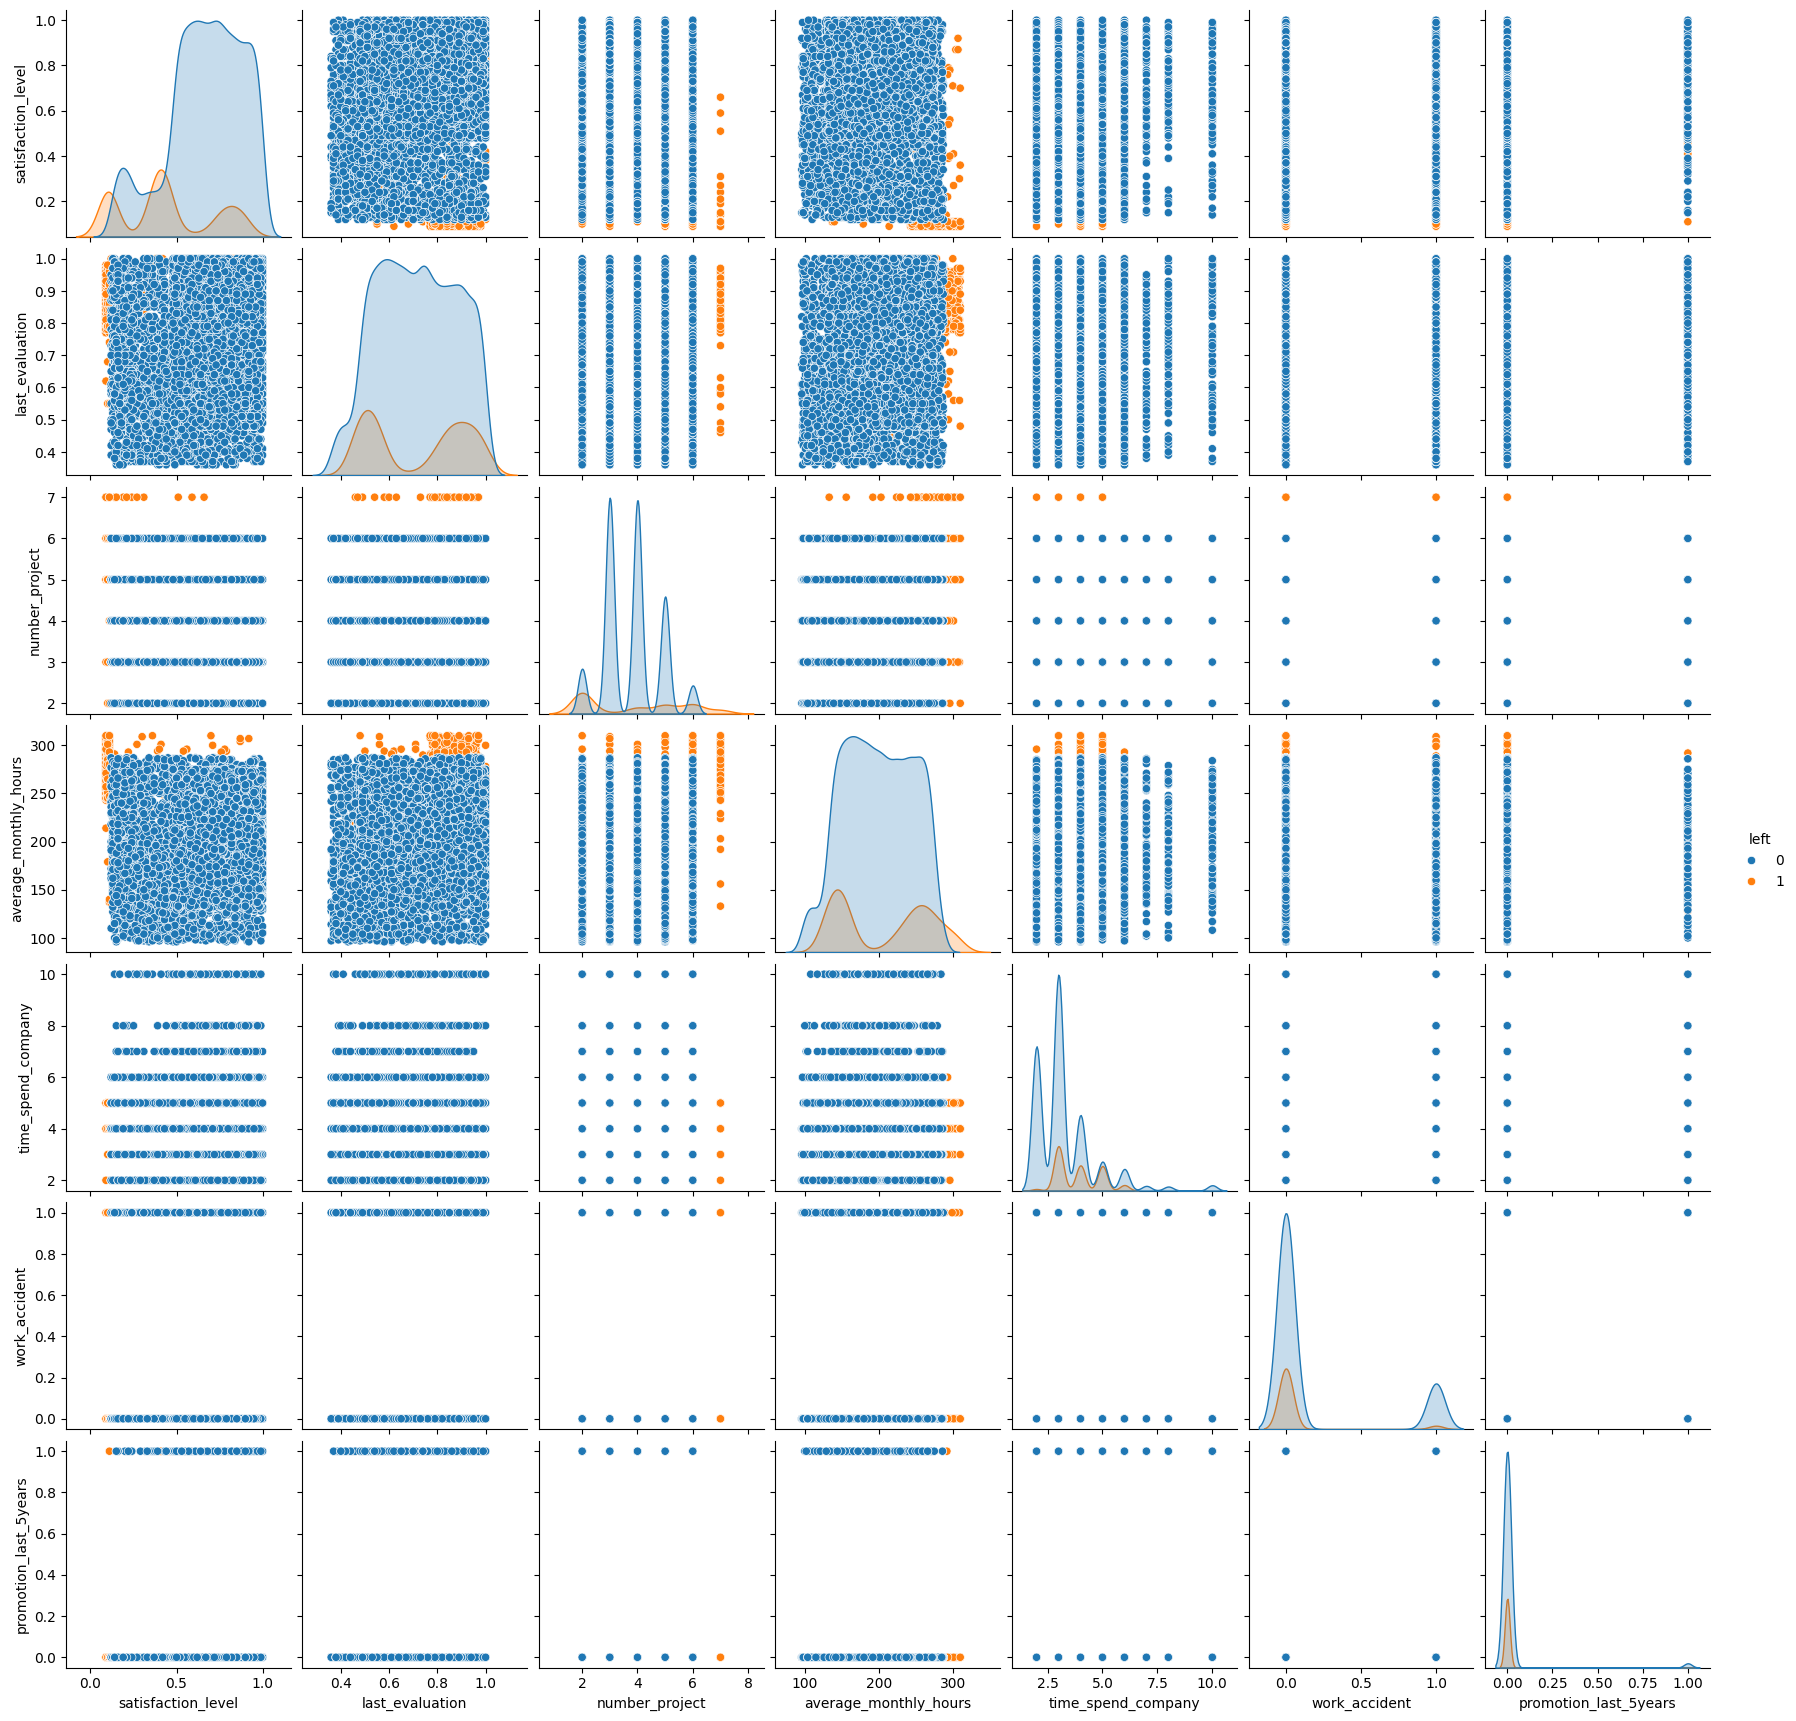

In [15]:
sns.pairplot(df_deduped, hue="left")

# Check if employees who leave tend to be less satisfied

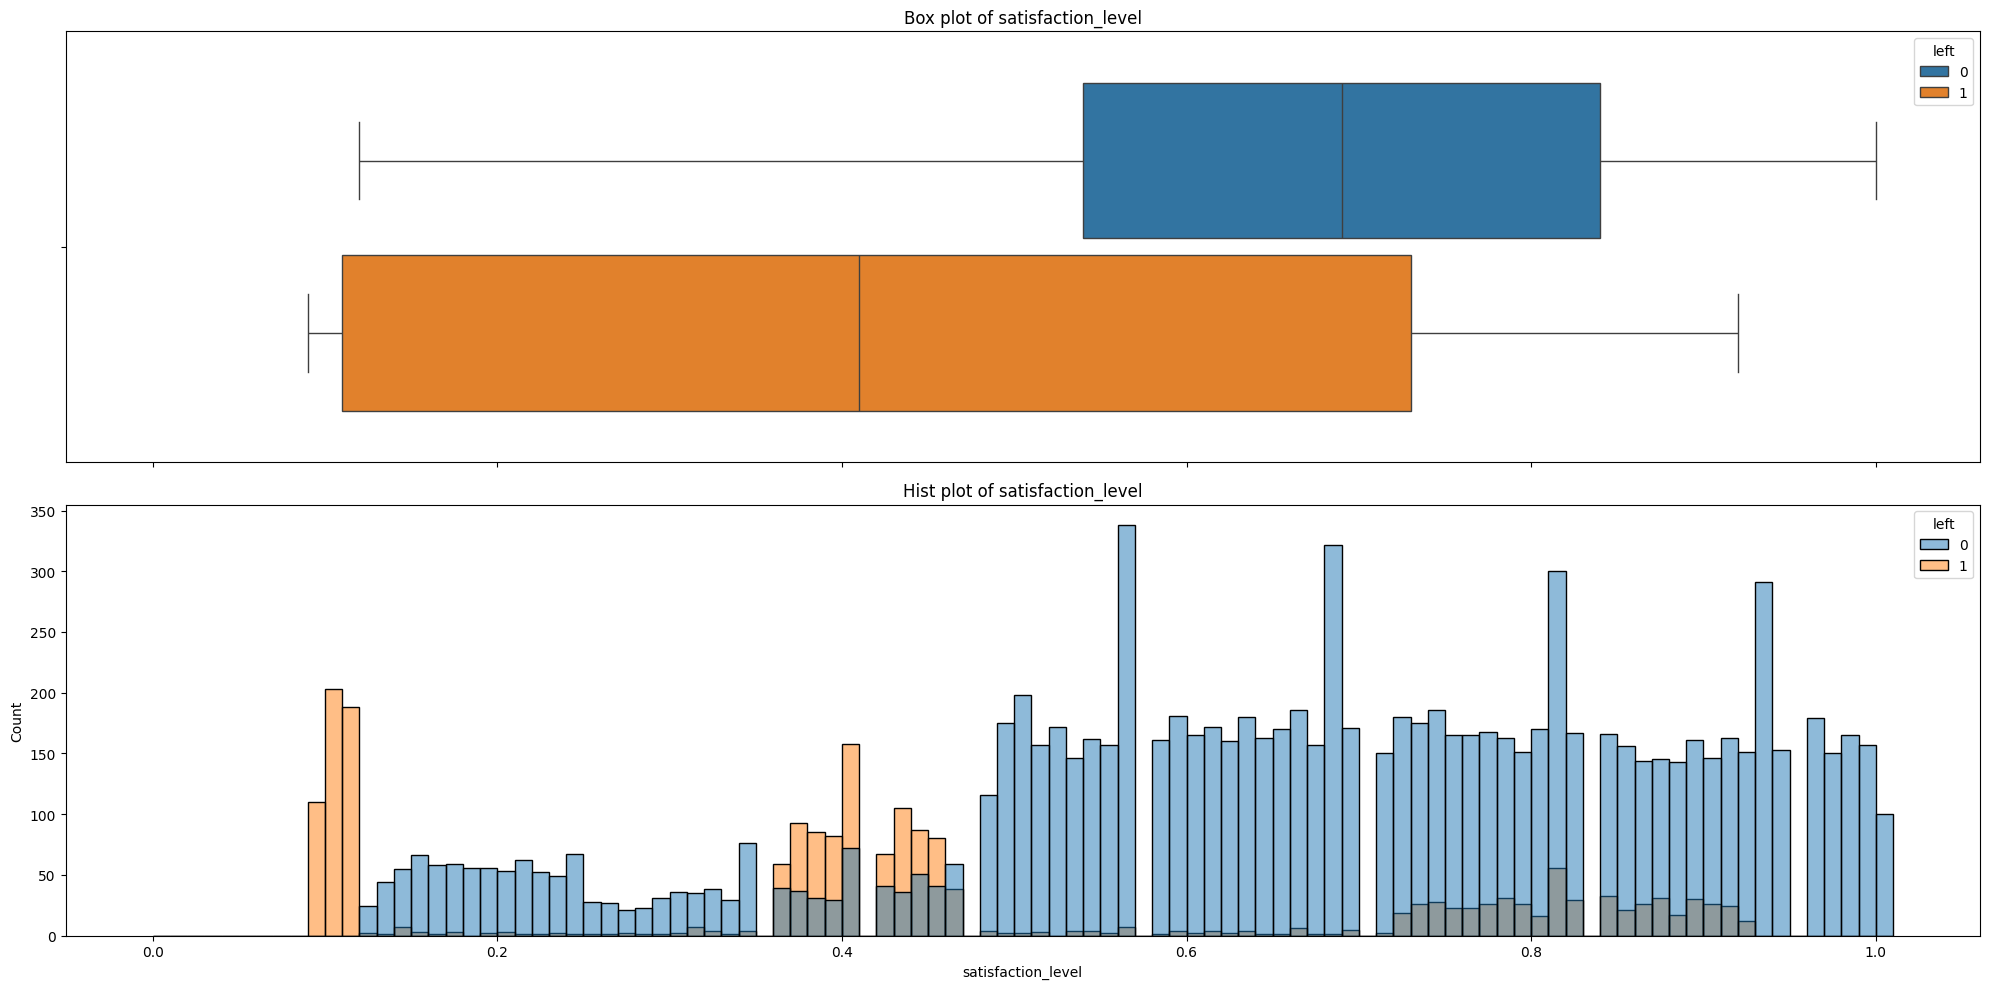

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(2,1, figsize=(20,10), sharex=True)
sns.boxplot(data=df_deduped, x="satisfaction_level", hue="left", gap=0.1, orient="h", ax=ax[0])
ax[0].set_title("Box plot of satisfaction_level")

sns.histplot(data=df_deduped, x="satisfaction_level", hue="left", bins=np.arange(0, 1.02, 0.01), ax=ax[1])
ax[1].set_title("Hist plot of satisfaction_level")

plt.tight_layout()

Text(0.5, 1.0, 'Based on employment status, how many are satisfied')

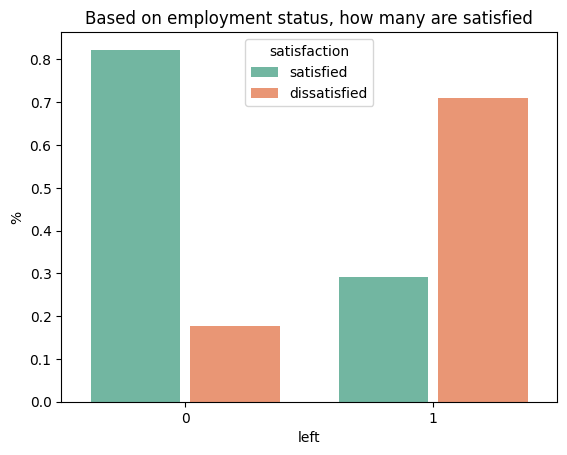

In [17]:
df_deduped["satisfaction"] = ""
df_deduped.loc[df_deduped["satisfaction_level"] < 0.5, "satisfaction"] = "dissatisfied"
df_deduped.loc[df_deduped["satisfaction_level"] >= 0.5, "satisfaction"] = "satisfied"

perc_satisfied = df_deduped.groupby("left")["satisfaction"].value_counts() / df_deduped.groupby("left")["satisfaction"].count()
perc_satisfied = perc_satisfied.reset_index().rename(columns={0:"%"})


fig, ax = plt.subplots(1,1)
sns.barplot(data=perc_satisfied, x="left", y="%", hue="satisfaction", gap=0.1, ax=ax, palette="Set2")
plt.title("Based on employment status, how many are satisfied")

# Check if employees who leave tend to be evaluated better

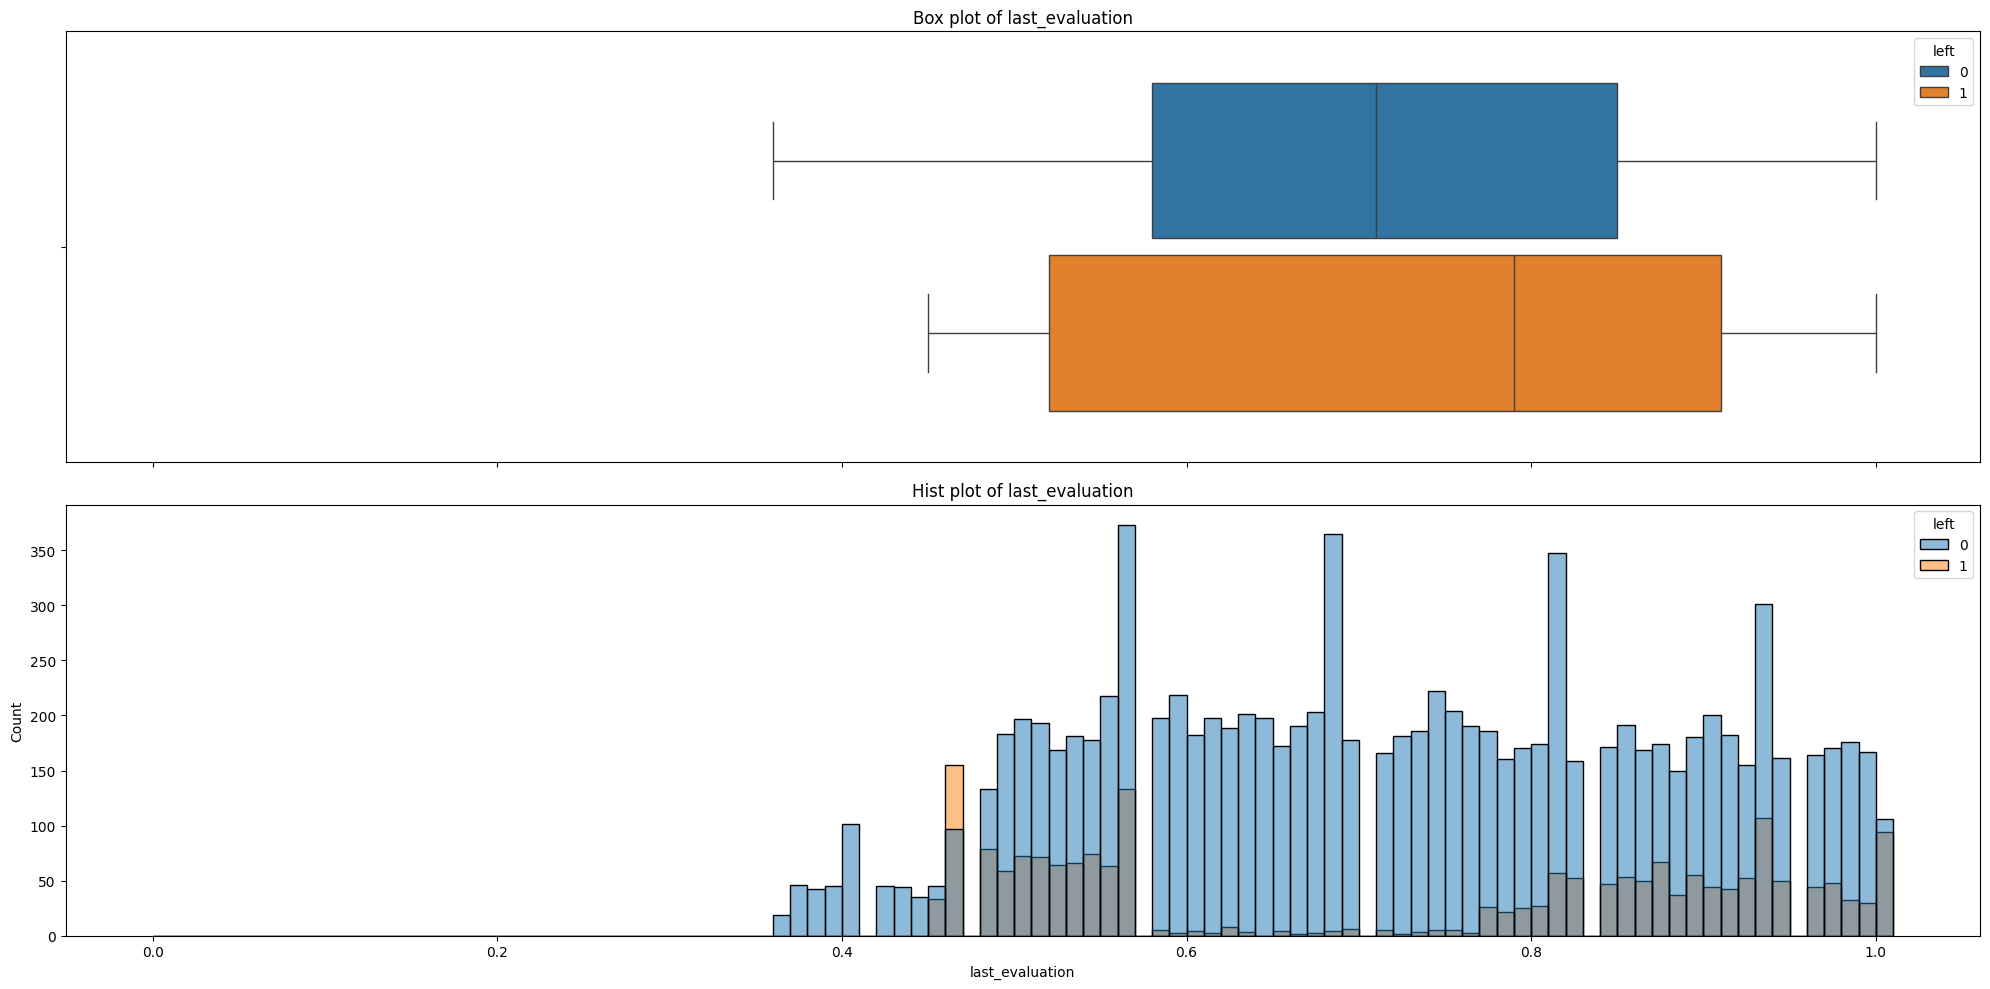

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(2,1, figsize=(20,10), sharex=True)
sns.boxplot(data=df_deduped, x="last_evaluation", hue="left", gap=0.1, orient="h", ax=ax[0])
ax[0].set_title("Box plot of last_evaluation")

sns.histplot(data=df_deduped, x="last_evaluation", hue="left", bins=np.arange(0, 1.02, 0.01), ax=ax[1])
ax[1].set_title("Hist plot of last_evaluation")

plt.tight_layout()

Text(0.5, 1.0, 'Based on employment status, how many were evaluated well')

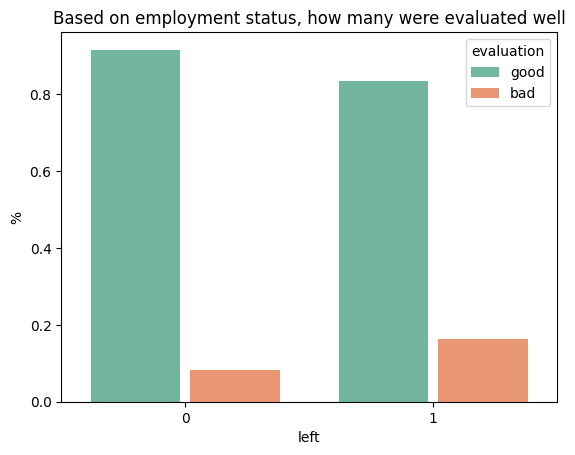

In [19]:
df_deduped["evaluation"] = ""
df_deduped.loc[df_deduped["last_evaluation"] < 0.5, "evaluation"] = "bad"
df_deduped.loc[df_deduped["last_evaluation"] >= 0.5, "evaluation"] = "good"

perc_satisfied = df_deduped.groupby("left")["evaluation"].value_counts() / df_deduped.groupby("left")["evaluation"].count()
perc_satisfied = perc_satisfied.reset_index().rename(columns={0:"%"})

fig, ax = plt.subplots(1,1)
sns.barplot(data=perc_satisfied, x="left", y="%", hue="evaluation", gap=0.1, ax=ax, palette="Set2")
plt.title("Based on employment status, how many were evaluated well")

# How many projects do employees work

Text(0.5, 1.0, 'Based on employment status, what percent have how many projects')

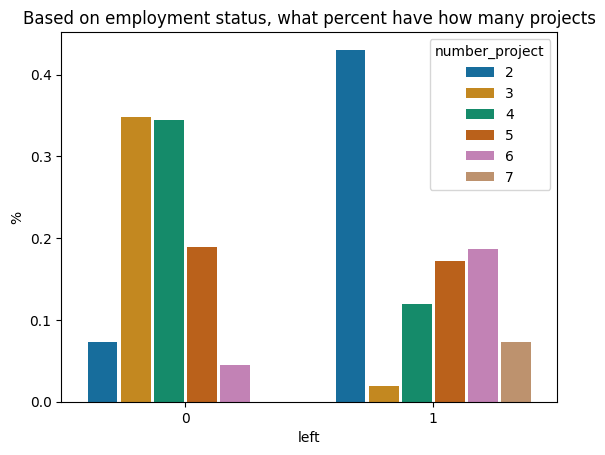

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
perc_projects = df_deduped.groupby("left")["number_project"].value_counts() / df_deduped.groupby("left")["number_project"].count()
perc_projects = perc_projects.reset_index().rename(columns={0:"%"})

fig, ax = plt.subplots(1,1)
sns.barplot(data=perc_projects, x="left", y="%", hue="number_project", gap=0.1, ax=ax, palette="colorblind")
plt.title("Based on employment status, what percent have how many projects")

# How many hours do employees work

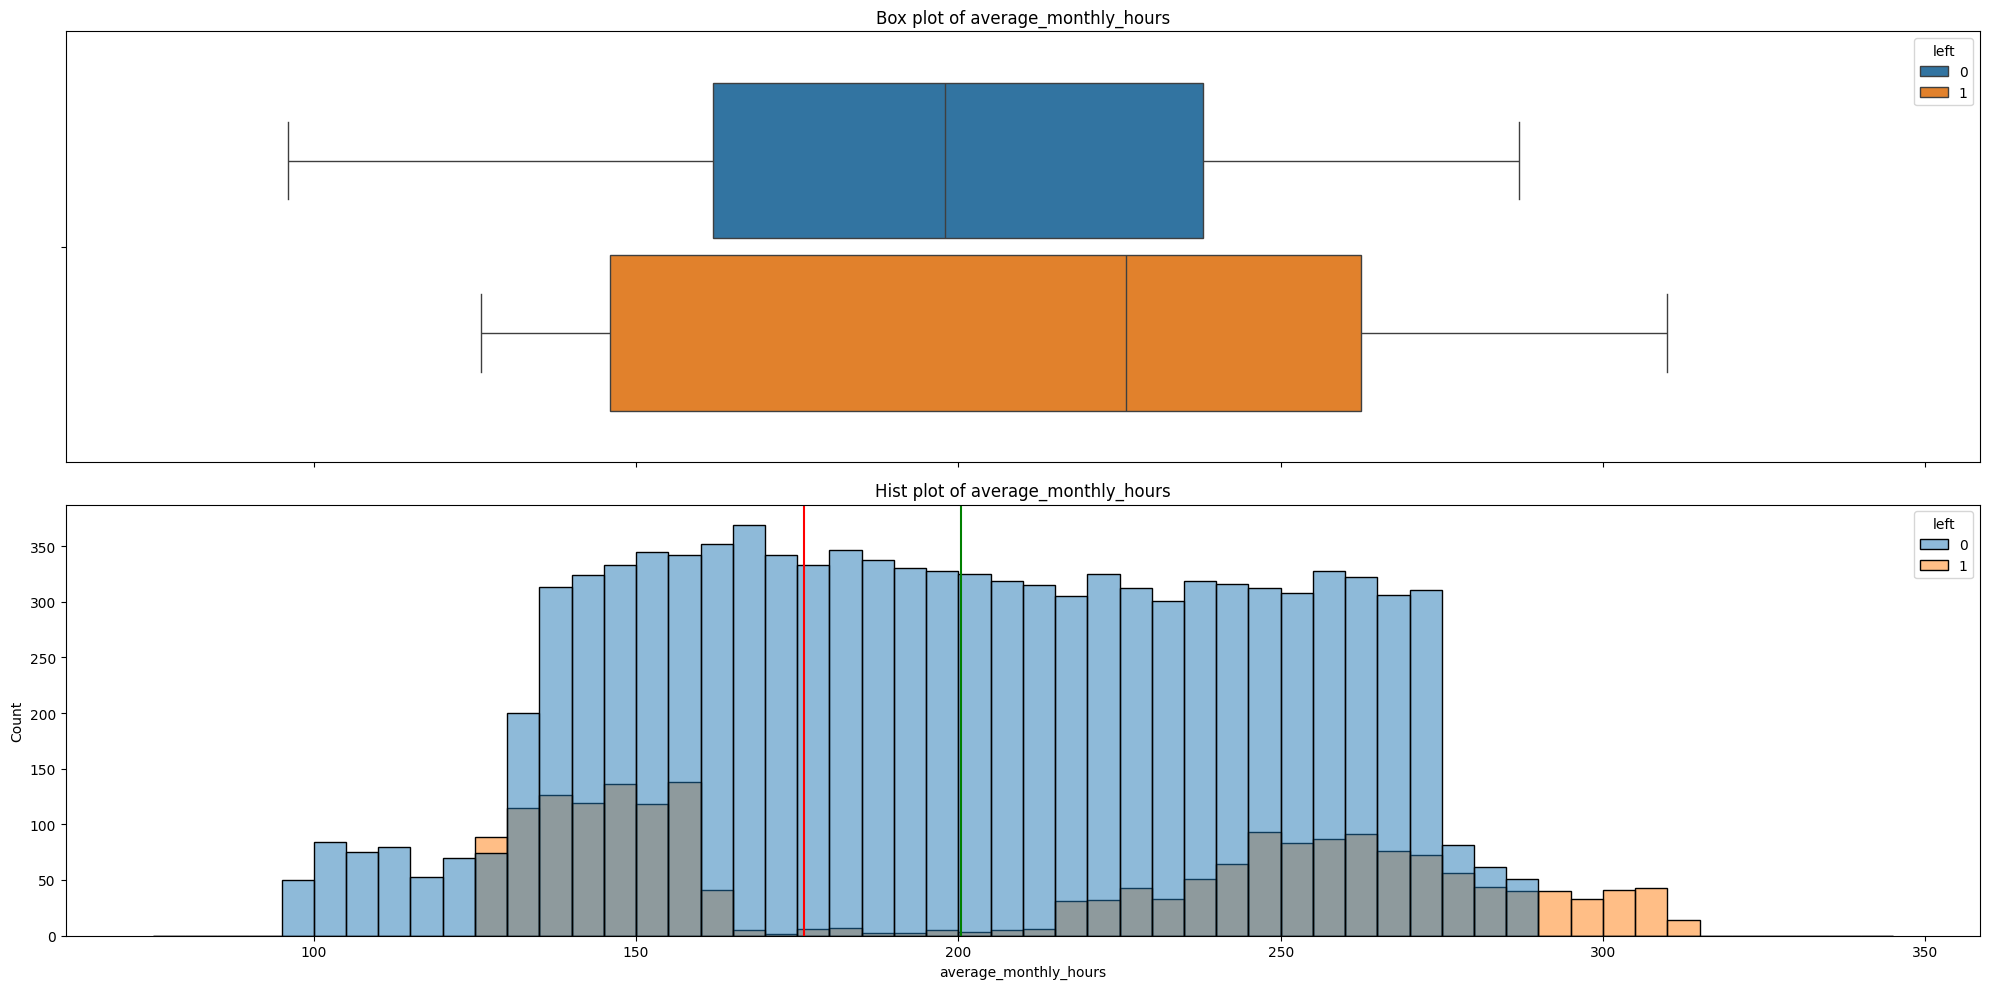

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(2,1, figsize=(20,10), sharex=True)
sns.boxplot(data=df_deduped, x="average_monthly_hours", hue="left", gap=0.1, orient="h", ax=ax[0])
ax[0].set_title("Box plot of average_monthly_hours")
# ax[0].set_xlim(xmin=75, xmax=345)

sns.histplot(data=df_deduped, x="average_monthly_hours", hue="left", bins=np.arange(75, 350, 5), ax=ax[1])
ax[1].set_title("Hist plot of average_monthly_hours")
ax[1].axvline(176, color="red")

ax[1].axvline(df_deduped["average_monthly_hours"].mean(), color="green")

plt.tight_layout()

Text(0.5, 1.0, 'Based on employment status, how many worked above the company average')

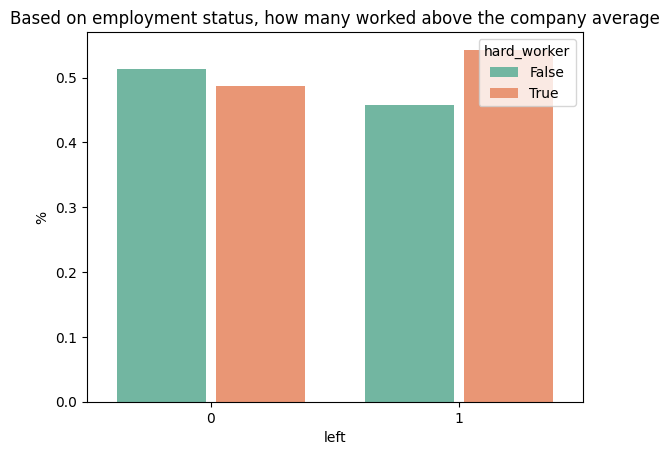

In [22]:
co_avg_hours = df_deduped["average_monthly_hours"].mean()

df_deduped["hard_worker"] = False
df_deduped.loc[df_deduped["average_monthly_hours"] < co_avg_hours, "hard_worker"] = False
df_deduped.loc[df_deduped["average_monthly_hours"] >= co_avg_hours, "hard_worker"] = True

perc_hard_working = df_deduped.groupby("left")["hard_worker"].value_counts() / df_deduped.groupby("left")["hard_worker"].count()
perc_hard_working = perc_hard_working.reset_index().rename(columns={0:"%"})

fig, ax = plt.subplots(1,1)
sns.barplot(data=perc_hard_working, x="left", y="%", hue="hard_worker", gap=0.1, ax=ax, palette="Set2")
plt.title("Based on employment status, how many worked above the company average")

# How long do employees stay at the company

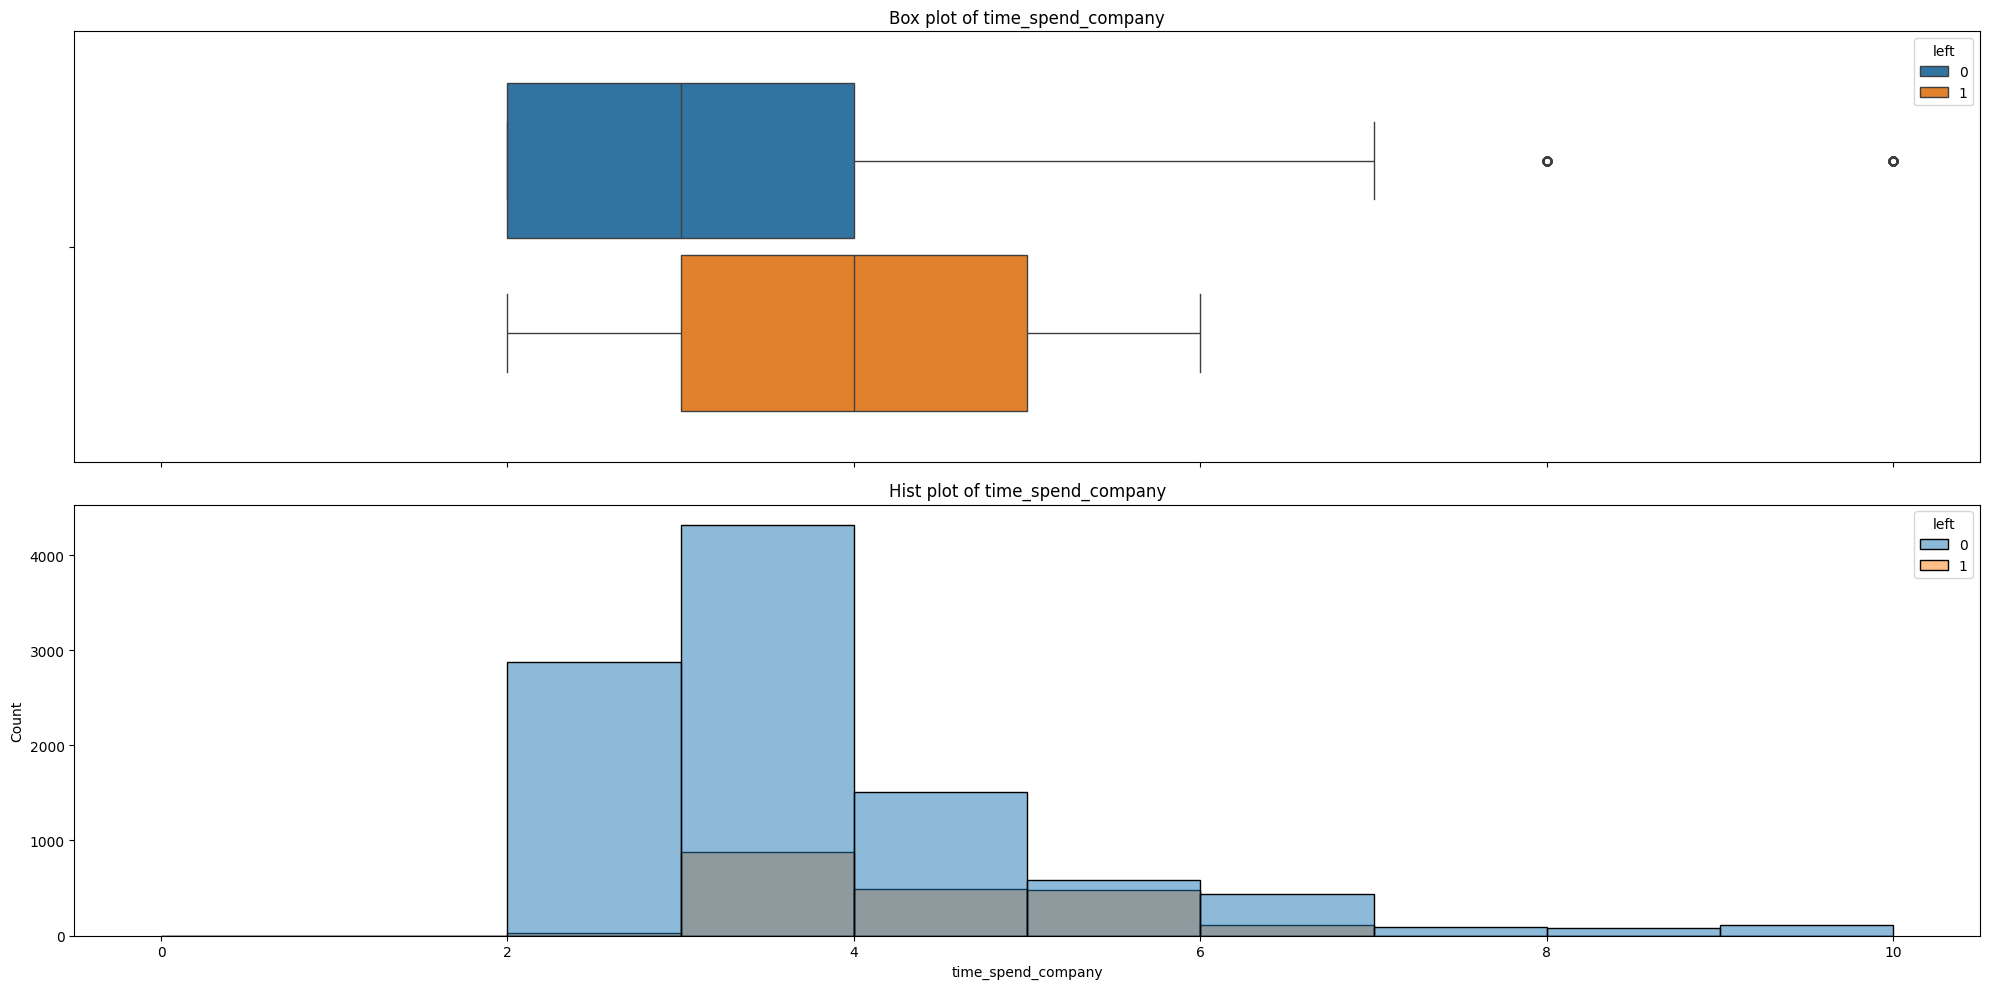

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(2,1, figsize=(20,10), sharex=True)
sns.boxplot(data=df_deduped, x="time_spend_company", hue="left", gap=0.1, orient="h", ax=ax[0])
ax[0].set_title("Box plot of time_spend_company")

sns.histplot(data=df_deduped, x="time_spend_company", hue="left", bins=np.arange(0, 11, 1), ax=ax[1])
ax[1].set_title("Hist plot of time_spend_company")

plt.tight_layout()

# How many employees have had a work accident

Text(0.5, 1.0, 'Based on employment status, what percent have had a work_accident')

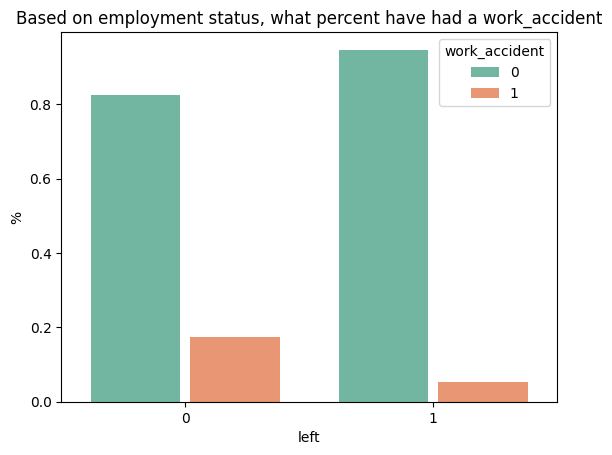

In [24]:
perc_accident = df_deduped.groupby("left")["work_accident"].value_counts() / df_deduped.groupby("left")["work_accident"].count()
perc_accident = perc_accident.reset_index().rename(columns={0:"%"})

fig, ax = plt.subplots(1,1)
sns.barplot(data=perc_accident, x="left", y="%", hue="work_accident", gap=0.1, ax=ax, palette="Set2")
plt.title("Based on employment status, what percent have had a work_accident")

# How many employees were recently promoted

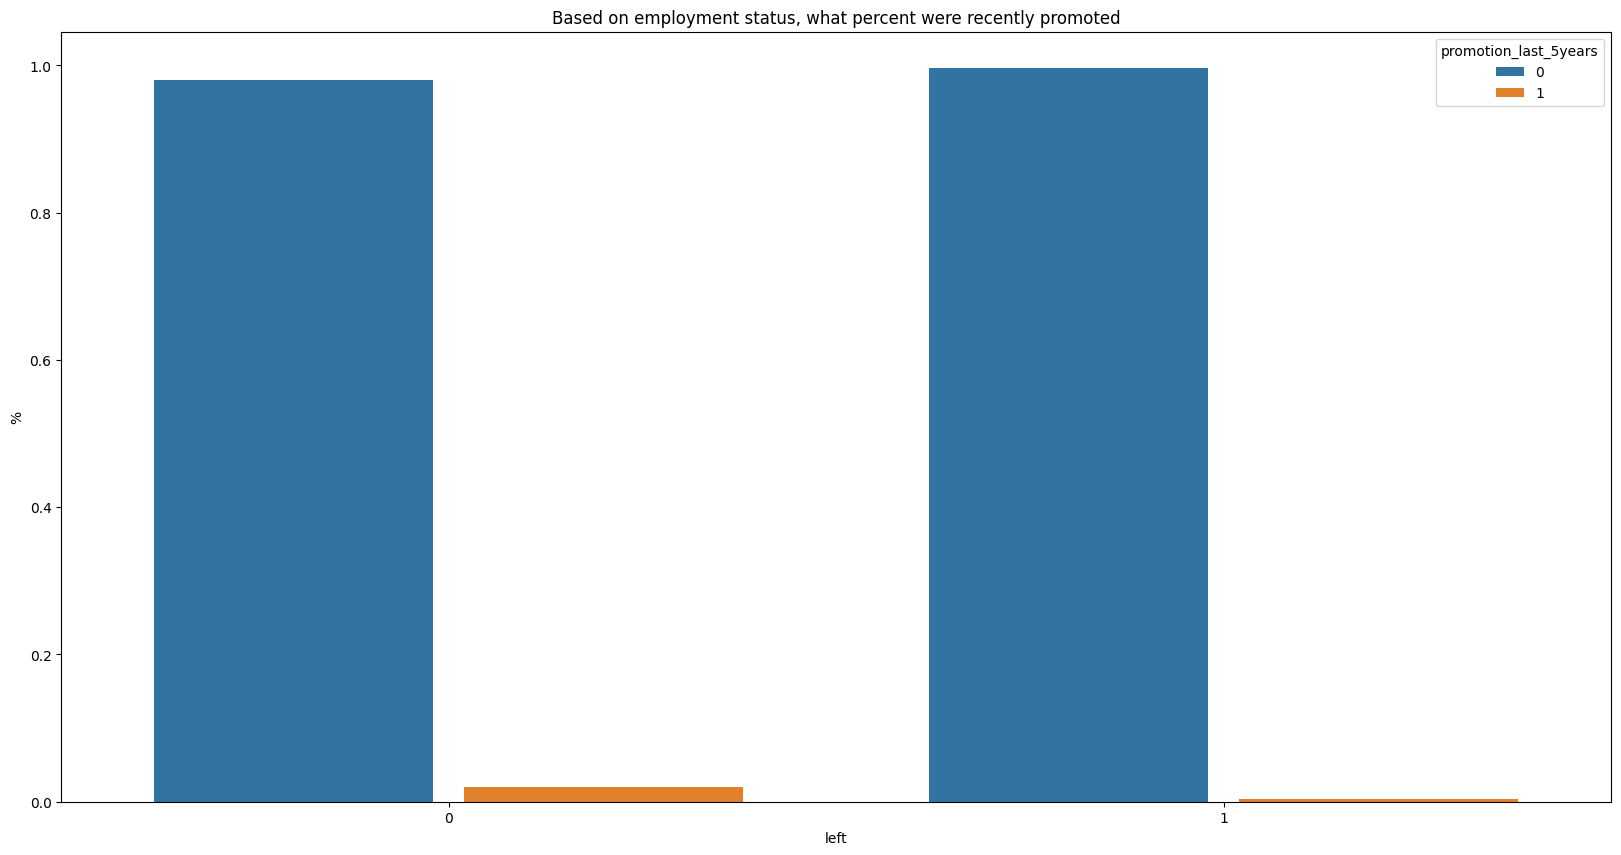

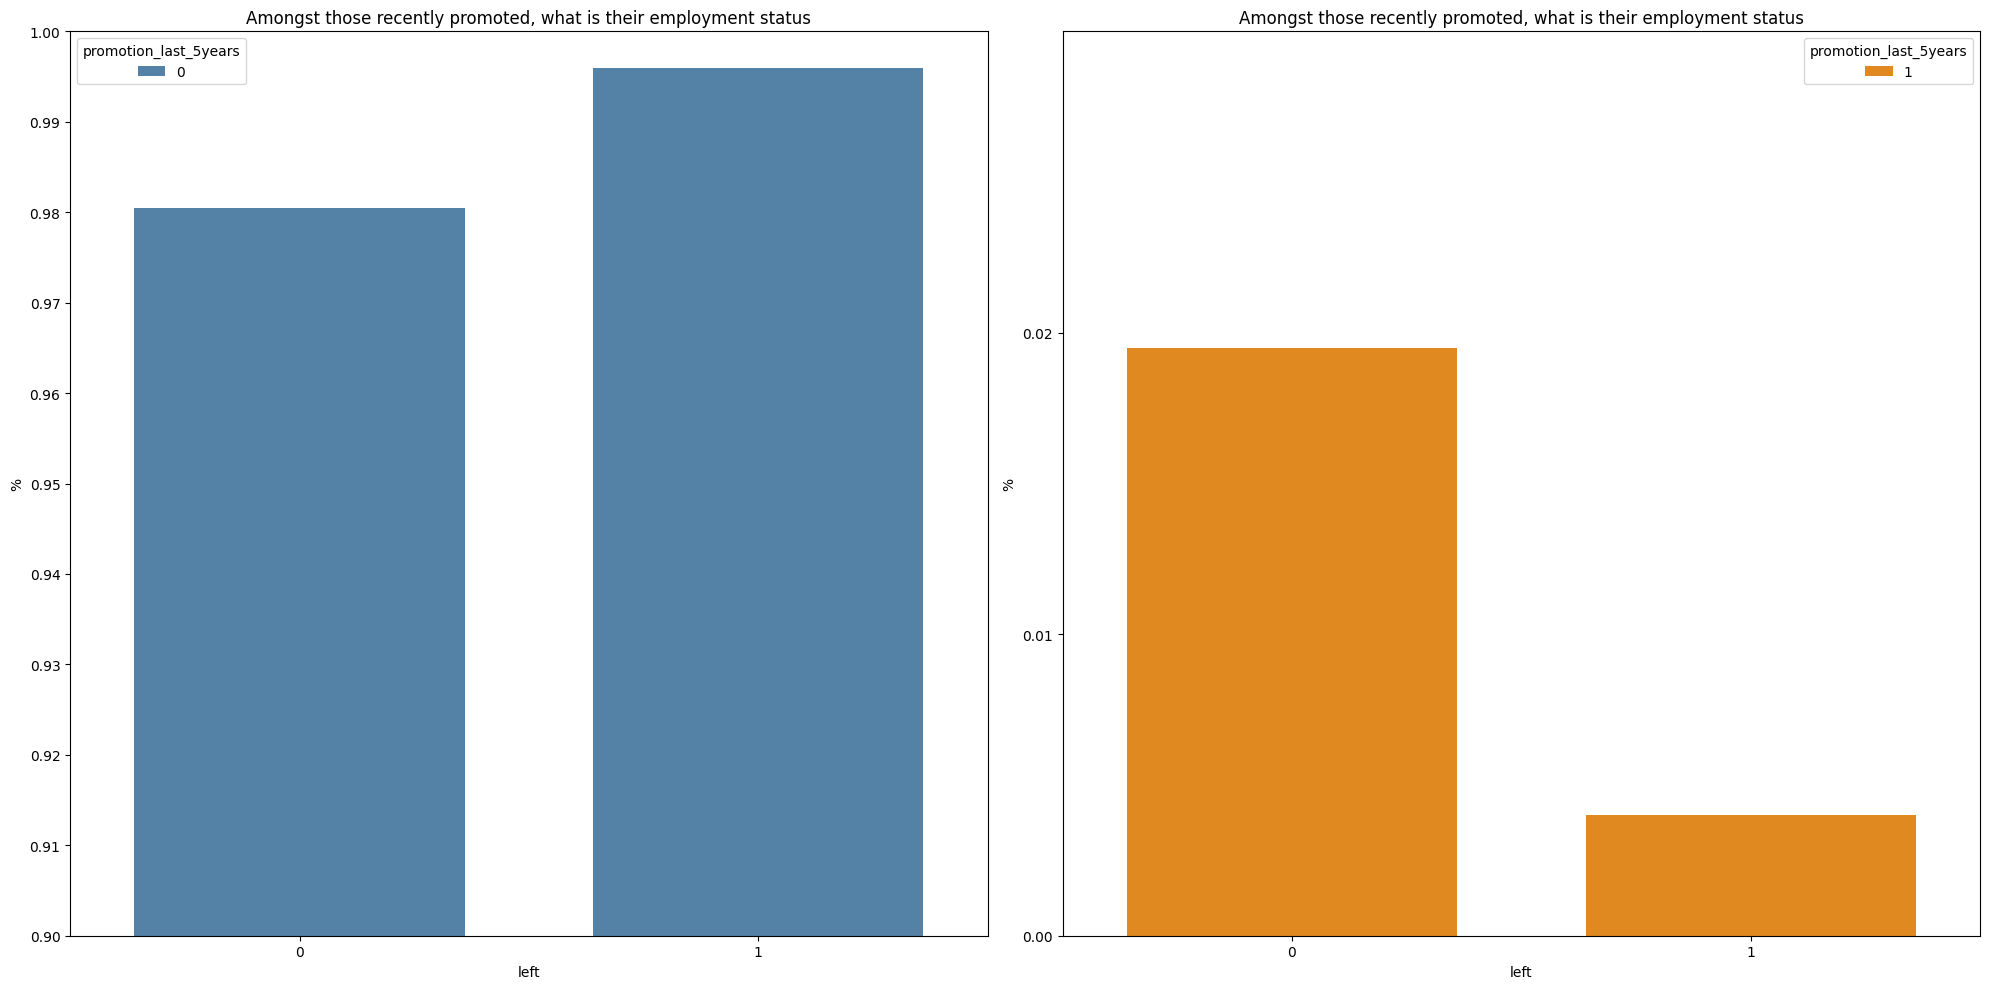

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
perc_promoted = df_deduped.groupby("left")["promotion_last_5years"].value_counts() / df_deduped.groupby("left")["promotion_last_5years"].count()
perc_promoted = perc_promoted.reset_index().rename(columns={0:"%"})

fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(data=perc_promoted, x="left", y="%", hue="promotion_last_5years", gap=0.1, ax=ax)
ax.set_title("Based on employment status, what percent were recently promoted")

fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.barplot(data=perc_promoted.loc[perc_promoted["promotion_last_5years"] == 0], x="left", y="%", hue="promotion_last_5years", gap=0.1, ax=ax[0], palette=["steelblue"])
ax[0].set_title("Amongst those recently promoted, what is their employment status")
ax[0].set_yticks(np.arange(0.9, 1.1, 0.01))
ax[0].set_ylim(0.9, 1)

sns.barplot(data=perc_promoted.loc[perc_promoted["promotion_last_5years"] == 1], x="left", y="%", hue="promotion_last_5years", gap=0.1, ax=ax[1], palette=["darkorange"])
ax[1].set_title("Amongst those recently promoted, what is their employment status")
ax[1].set_yticks(np.arange(0, 0.03, 0.01))
ax[1].set_ylim(0, 0.03)

plt.tight_layout()

# What departments do employees work

Text(0.5, 1.0, 'Based on employment status, what percent worked in which departments')

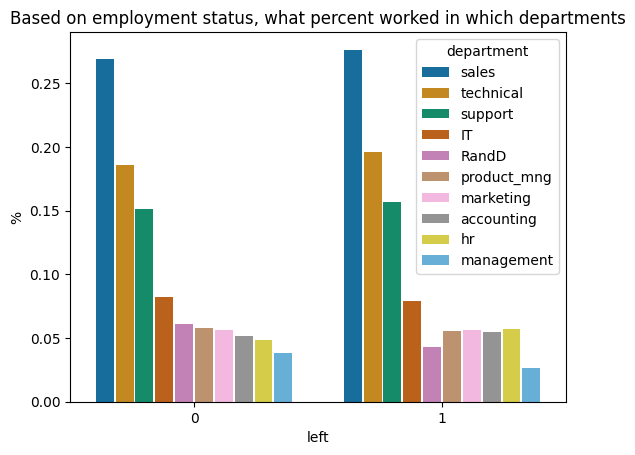

In [26]:
perc_dpts = df_deduped.groupby("left")["department"].value_counts() / df_deduped.groupby("left")["department"].count()
perc_dpts = perc_dpts.reset_index().rename(columns={0:"%"})

fig, ax = plt.subplots(1,1)
sns.barplot(data=perc_dpts, x="left", y="%", hue="department", gap=0.1, ax=ax, palette="colorblind")
plt.title("Based on employment status, what percent worked in which departments")

# What salary types do employees have

Text(0.5, 1.0, 'Based on employment status, what percent have what salary type')

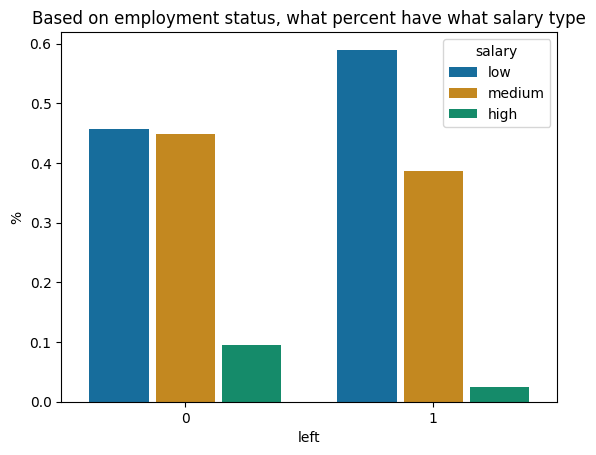

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###
perc_salaries = df_deduped.groupby("left")["salary"].value_counts() / df_deduped.groupby("left")["salary"].count()
perc_salaries = perc_salaries.reset_index().rename(columns={0:"%"})

fig, ax = plt.subplots(1,1)
sns.barplot(data=perc_salaries, x="left", y="%", hue="salary", gap=0.1, ax=ax, palette="colorblind")
plt.title("Based on employment status, what percent have what salary type")

# Employee hours per project

Text(0.5, 1.0, 'Hist plot of hours spent divided by projects')

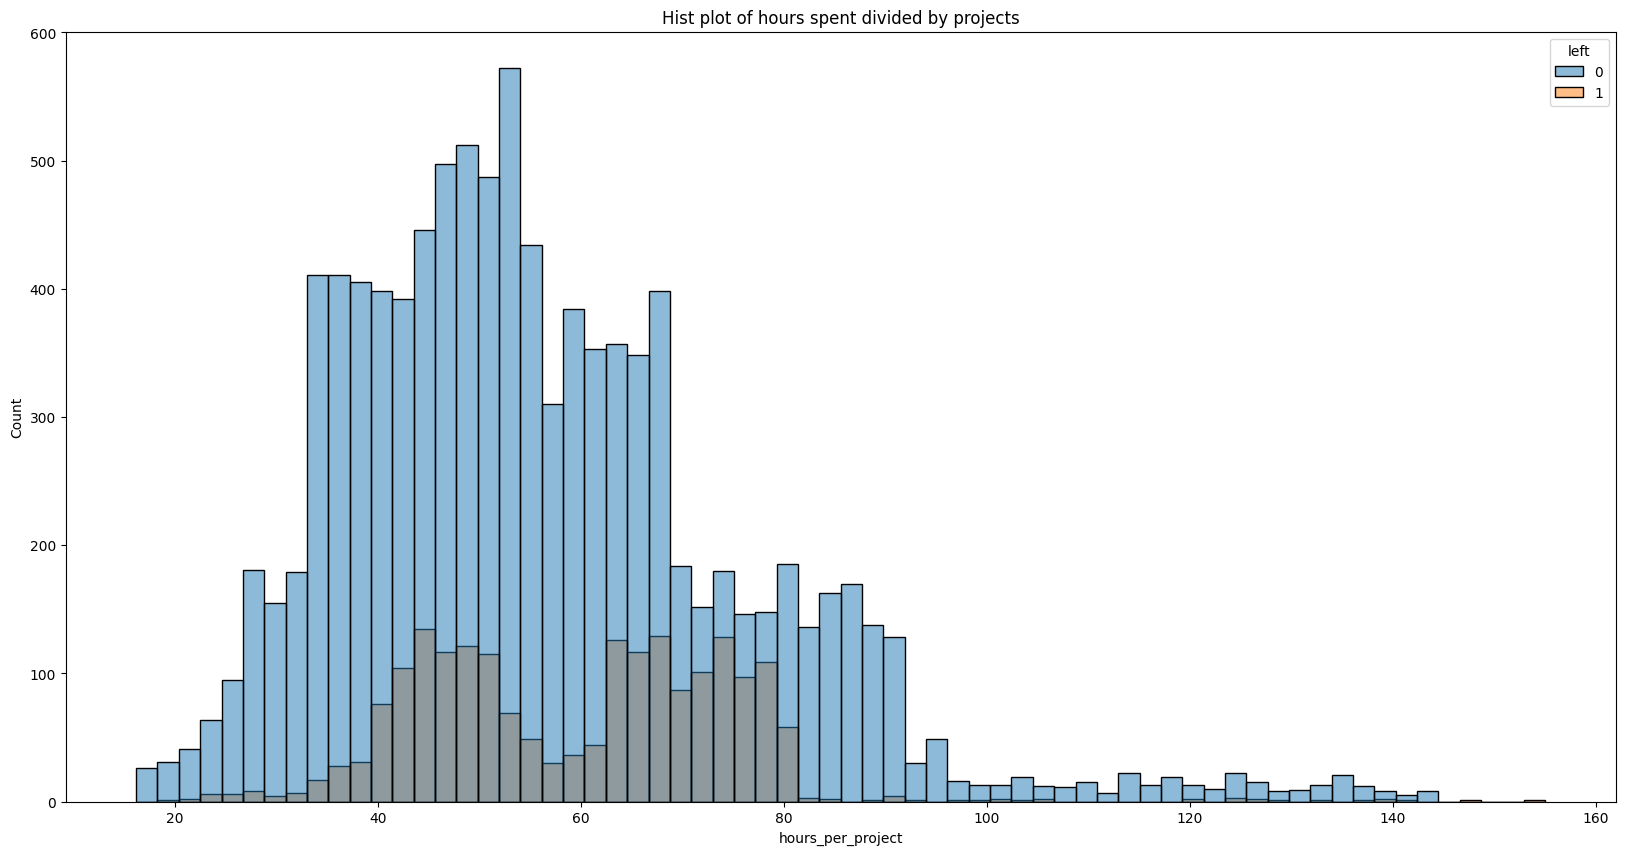

In [28]:
df_deduped["hours_per_project"] = df_deduped["average_monthly_hours"] / df_deduped["number_project"]

fig, ax = plt.subplots(1,1, figsize=(20,10), sharex=True)
sns.histplot(data=df_deduped, x="hours_per_project", hue="left", ax=ax)
ax.set_title("Hist plot of hours spent divided by projects")

Text(0.5, 1.0, 'Average monthly hours split by number of projects')

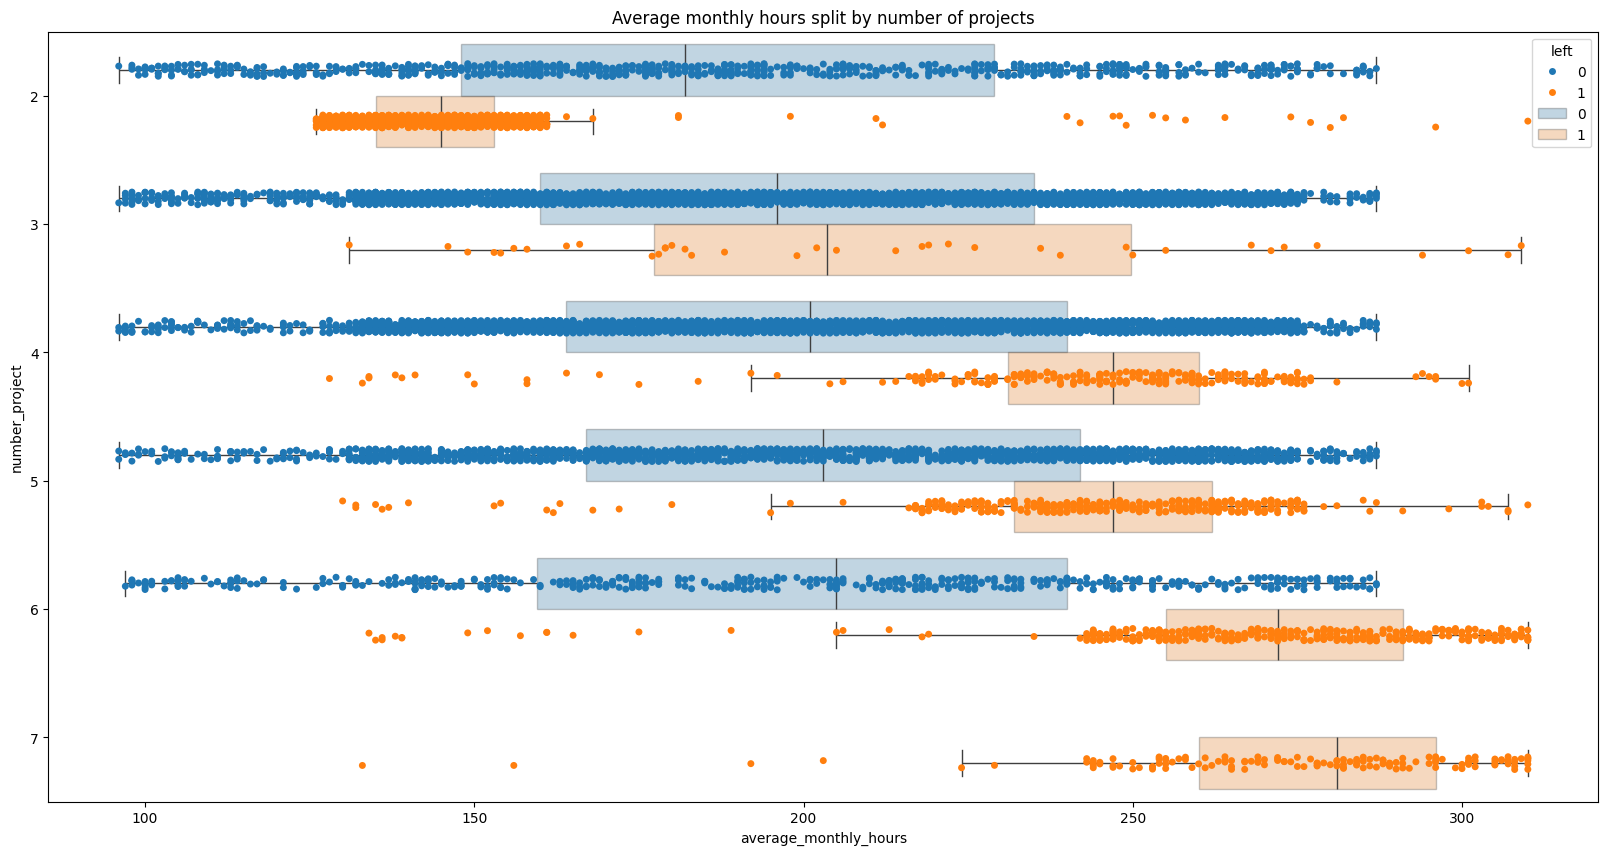

In [29]:
fig, ax = plt.subplots(1,1, figsize=(20,10), sharex=True)
sns.stripplot(data=df_deduped, x="average_monthly_hours", y="number_project", hue="left", orient="h", dodge=True, ax=ax)
sns.boxplot(data=df_deduped, x="average_monthly_hours", y="number_project", hue="left", orient="h", ax=ax, showfliers=False, boxprops={"alpha":0.3})
ax.set_title("Average monthly hours split by number of projects")

# Employees projects to years in company ratio

Text(0.5, 1.0, 'Hist plot of projects received against years in company')

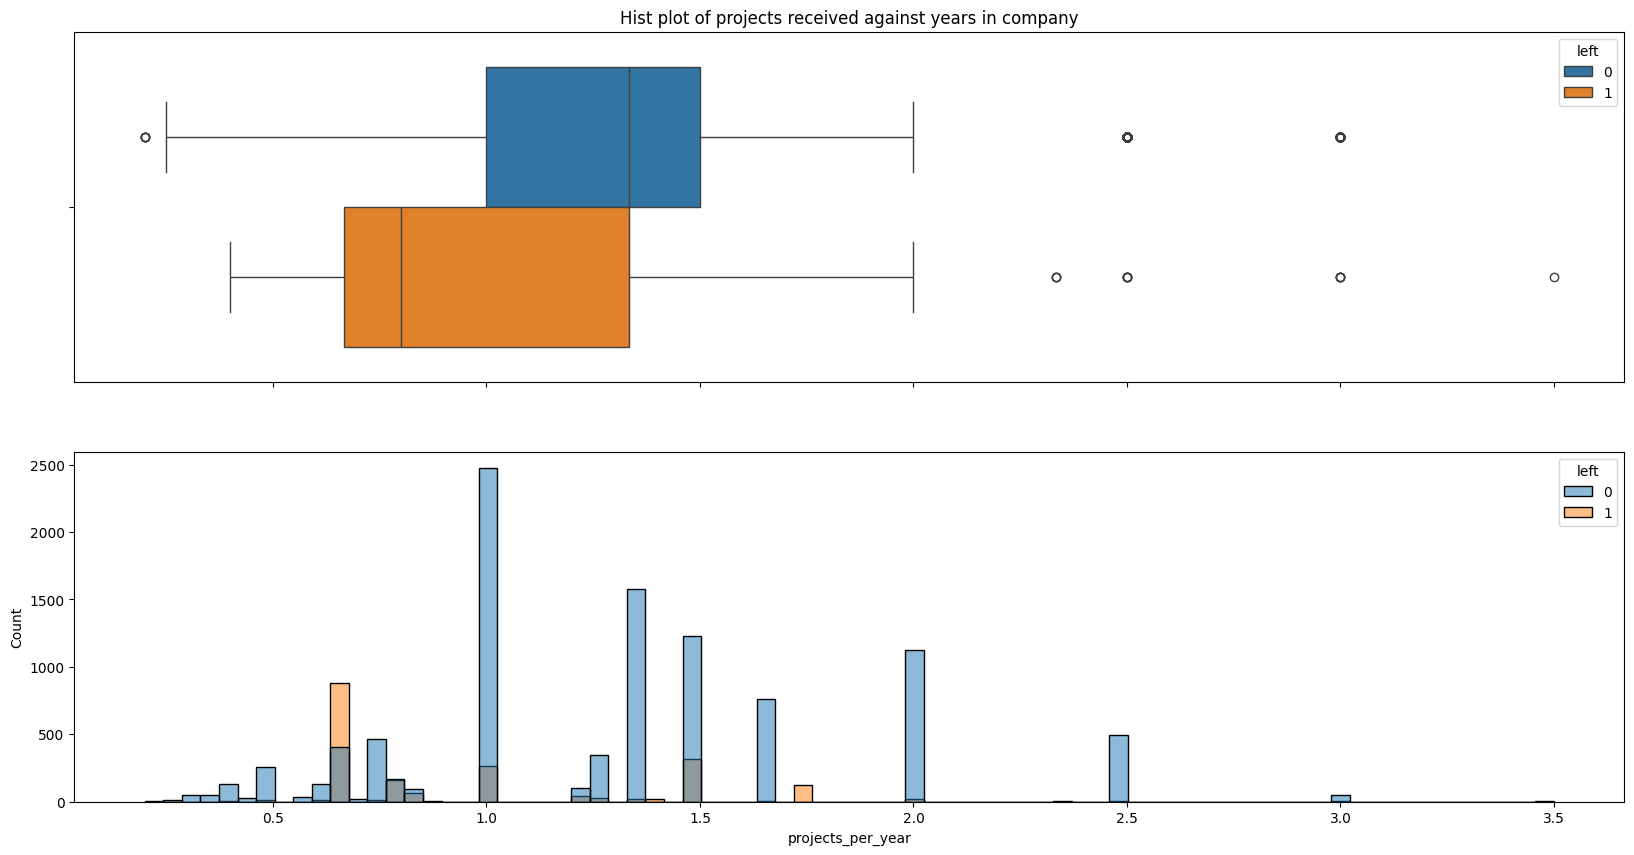

In [30]:
df_deduped["projects_per_year"] = df_deduped["number_project"] / df_deduped["time_spend_company"]

fig, ax = plt.subplots(2,1, figsize=(20,10), sharex=True)
sns.boxplot(data=df_deduped, x="projects_per_year", hue="left", ax=ax[0])

sns.histplot(data=df_deduped, x="projects_per_year", hue="left", ax=ax[1])
ax[0].set_title("Hist plot of projects received against years in company")

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]
1. Those who leave seem to be more dissatisfied
2. Those who leave are somewhat more poorly evaluated
3. A lot of employees who left worked on 2 projects. All of the employees who worked on 7 projects left. Employees with 6 projects make up a higher percent of those who left than those who stayed. Not many of those who left worked on 3 projects nor 4 projects.
    1. Comparing by project count, employees who left who had 2 projects worked significantly fewer monthly hours than those those who stayed. This trend seems to immediately reverse upon 3 projects; those who leave with 3 or more projects tended to work higher monthly hours than those who stayed.
    2. Comparing the number of projects to the years in company ratio, those who leave seem to have fewer projects per year than the rest of the company.
5. Based on average monthly hours worked, there are two distinct groups of people who leave: those who worked fewer than (company) average hours and those who worked more than average hours. Compared against current employees, more who left seem to be relative overachievers than not.
6. Employees who left seem to have higher tenure.
7. Those who leave seem to have lower work accident rates.
8. There is a nearly indistinguishable relationship wrt to employees leaving and being recently promoted (single digit percents).
9. Employees do not seem to leave more from any department in particular.
10. Low salary employees seem to leave more often. However medium and high salary employees do not seem to leave.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

Classification

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

Logistic (possibly, if the outliers are nice) or any of the ML models.

### Modeling

Add as many cells as you need to conduct the modeling process.

# Data Separation + Helper Methods

In [31]:
df_deduped.head(10)
df_deduped["salary"] = df_deduped["salary"].map({"low": 1, "medium": 2, "high": 3})

In [32]:
### YOUR CODE HERE ###
y = df_deduped["left"]
x = df_deduped.drop(columns=["left", "department", "hours_per_project", "promotion_last_5years", "hard_worker", "satisfaction", "evaluation"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

In [33]:
def dump_metrics(model, preds, true, model_name, scores_df=None):
    precision = metrics.precision_score(true, preds)
    recall = metrics.recall_score(true, preds)
    accuracy = metrics.accuracy_score(true, preds)
    f1 = metrics.f1_score(true, preds)

    if scores_df is not None:
        scores_df = pd.concat([scores_df, pd.DataFrame({
            "Name": model_name,
            "Precision" : precision,
            "Recall": recall,
            "Accuracy": accuracy,
            "F1": f1
        }, index=[0])])

    else:
        scores_df = pd.DataFrame({
            "Name": model_name,
            "Precision" : precision,
            "Recall": recall,
            "Accuracy": accuracy,
            "F1": f1
        }, index=[0])

    return scores_df

def save_model(model, model_name):
    with open(f"{model_name}.pickle", "wb") as out_file:
        pickle.dump(model, out_file)

def load_model(model_name):
    with open(f"{model_name}.pickle", "rb") as in_file:
        return pickle.load(in_file)



# Logistic Regression Model

In [34]:
%%time

force_retrain_logreg = False

if force_retrain_logreg:
    log_model = LogisticRegression(random_state=0)
    
    pipe = Pipeline(steps=[
        ("feat_sel", RFE(log_model)),
        ("model", log_model)
    ])
    
    cv_params = {
        "feat_sel__n_features_to_select": np.arange(0, len(x_train.columns)),
        "model__penalty": [None, "l2", "l1", "elasticnet"],
        "model__solver" :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        "model__max_iter" : np.arange(1000, 10000, 1000)
    }
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    
    log_cv = GridSearchCV(pipe, cv_params, scoring=scoring, refit='f1', verbose=1, n_jobs=-1).fit(x_train, y_train)

    save_model(log_cv, "tuned_feature_selected_LogReg")

else:
    log_cv = load_model("tuned_feature_selected_LogReg")

CPU times: total: 0 ns
Wall time: 2 ms


In [35]:
print(log_cv.best_estimator_["feat_sel"].support_, log_cv.best_estimator_["feat_sel"].ranking_)
x_train.head()

[ True False  True False  True  True False  True] [1 2 1 4 1 1 3 1]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,salary,projects_per_year
9187,0.90,0.55,4,211,3,0,2,1.333333
7204,0.59,0.97,3,258,2,0,1,1.500000
10499,0.17,0.73,4,188,5,0,1,0.800000
6424,0.50,0.89,3,187,4,1,2,0.750000
3197,0.94,0.77,5,210,3,0,3,1.666667


Text(0.5, 1.0, 'ROC: Logistic Classifier')

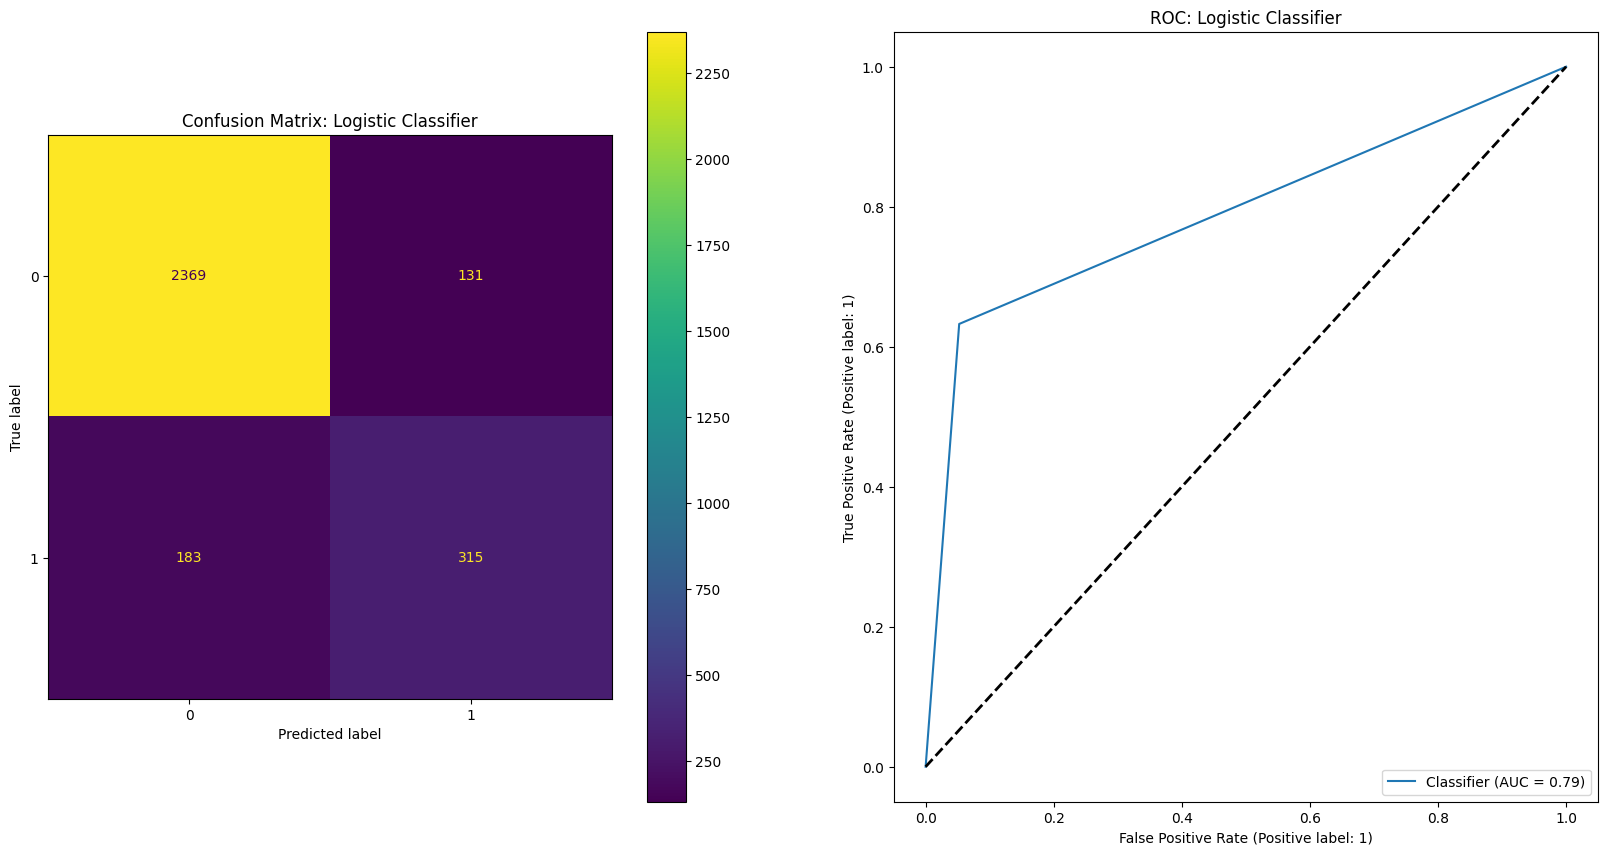

In [36]:
log_preds = log_cv.predict(x_test)

fig, ax = plt.subplots(1, 2, figsize=(20,10))

cm = metrics.confusion_matrix(y_test, log_preds, labels=log_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_cv.classes_)
disp.plot(ax=ax[0])
ax[0].set_title("Confusion Matrix: Logistic Classifier")

metrics.RocCurveDisplay.from_predictions(y_test, log_preds, ax=ax[1])
ax[1].plot([0, 1], [0, 1], 'k--', lw=2)
ax[1].set_title("ROC: Logistic Classifier")

In [37]:
scores_df = dump_metrics(log_cv, log_cv.predict(x_train), y_train, "Logistic: Training")
scores_df = dump_metrics(log_cv, log_preds, y_test, "Logistic: Testing", scores_df)

scores_df

,Name,Precision,Recall,Accuracy,F1
0,Logistic: Training,0.712299,0.651708,0.898477,0.680658
0,Logistic: Testing,0.706278,0.632530,0.895264,0.667373


In [38]:
np.append(np.arange(1, 11, 2), [None])

array([1, 3, 5, 7, 9, None], dtype=object)

# Random Forest Model

In [39]:
%%time 

force_retrain_rf = False

if force_retrain_rf:
    rf_model = RandomForestClassifier(random_state=0)
    
    cv_params = {
        "n_estimators" : np.arange(10, 110, 10),
        "criterion" : ["gini", "entropy", "log_loss"],
        "max_depth" : np.append(np.arange(1, 11, 2), [None]),
        # "min_samples_split" : np.append(np.arange(1,10), np.arange(0.1, 0.6, 0.1)),
        # "min_samples_leaf" : np.append(np.arange(1,10), np.arange(0.1, 0.6, 0.1)),
        "max_features" : ["sqrt", "log2", None],
    }

    scoring = ['accuracy', 'precision', 'recall', 'f1']

    rf_cv = GridSearchCV(rf_model, cv_params, scoring=scoring, refit='f1', verbose=1, n_jobs=-1).fit(x_train, y_train)

    save_model(rf_cv, "tuned_Random_Forest")

else:
    rf_cv = load_model("tuned_Random_Forest")

CPU times: total: 0 ns
Wall time: 3 ms


Text(0.5, 1.0, 'ROC: Random Forest')

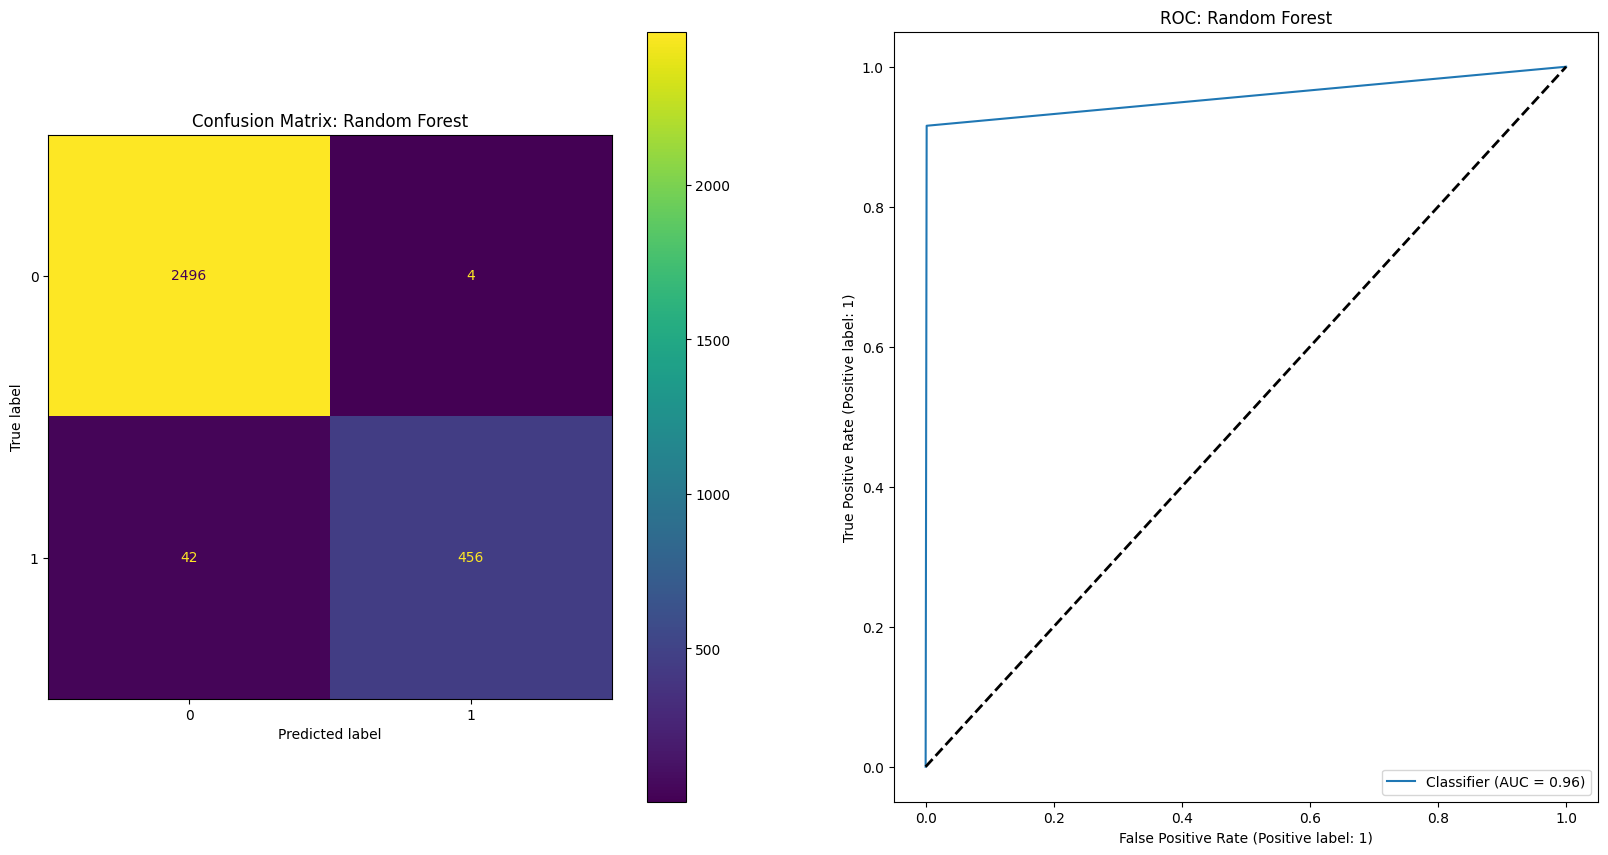

In [40]:
rf_preds = rf_cv.predict(x_test)

fig, ax = plt.subplots(1, 2, figsize=(20,10))

cm = metrics.confusion_matrix(y_test, rf_preds, labels=rf_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)
disp.plot(ax=ax[0])
ax[0].set_title("Confusion Matrix: Random Forest")

metrics.RocCurveDisplay.from_predictions(y_test, rf_preds, ax=ax[1])
ax[1].plot([0, 1], [0, 1], 'k--', lw=2)
ax[1].set_title("ROC: Random Forest")

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'satisfaction_level'),
  Text(1, 0, 'average_monthly_hours'),
  Text(2, 0, 'number_project'),
  Text(3, 0, 'time_spend_company'),
  Text(4, 0, 'projects_per_year'),
  Text(5, 0, 'last_evaluation'),
  Text(6, 0, 'salary'),
  Text(7, 0, 'work_accident')])

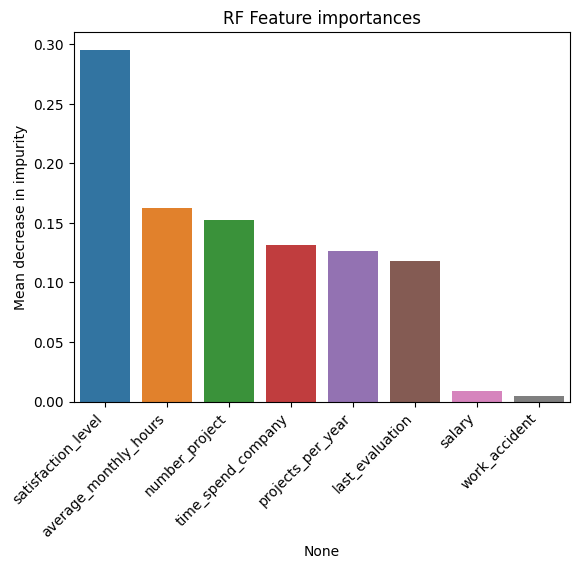

In [41]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=x_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)

sns.barplot(x=rf_importances.index, y=rf_importances.values, hue=rf_importances.index, legend=False)
plt.title('RF Feature importances')
plt.ylabel('Mean decrease in impurity')
plt.xticks(rotation=45, ha="right")

In [42]:
scores_df = dump_metrics(rf_cv, rf_cv.predict(x_train), y_train, "RF: Training", scores_df)
scores_df = dump_metrics(rf_cv, rf_preds, y_test, "RF: Testing", scores_df)

scores_df

,Name,Precision,Recall,Accuracy,F1
0,Logistic: Training,0.712299,0.651708,0.898477,0.680658
0,Logistic: Testing,0.706278,0.632530,0.895264,0.667373
0,RF: Training,0.999330,0.999330,0.999778,0.999330
0,RF: Testing,0.991304,0.915663,0.984656,0.951983


# XGBoost

In [43]:
%%time

force_retrain_xgb = False

if force_retrain_xgb:
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=0)

    cv_params = {
        "booster" : ["gbtree", "gblinear", "dart"],
        "device" : ["cuda"],
        "learning_rate" : np.arange(0.1, 1.1, 0.2),
        "max_depth": np.append(np.arange(1, 11, 2), [0]),
        # "subsample": np.arange(0.1, 1.1, 0.2),
        # "sampling_method" : ["uniform", "subsample", "gradient_based"],
        # "lambda" : np.arange(0, 100, 1),
        # "alpha" : np.arange(0, 100, 1),
        # 'min_child_weight': np.arange(1,11,2),
        'n_estimators': np.arange(5, 21, 5),
        'colsample_bytree': np.arange(0.1, 1.1, 0.2)
    }

    scoring = ['accuracy', 'precision', 'recall', 'f1']


    xgb_cv = GridSearchCV(xgb_model, cv_params, scoring=scoring, refit='f1', verbose=1, n_jobs=-1).fit(x_train, y_train)

    save_model(xgb_cv, "tuned_XGBoost")

else:
    xgb_cv = load_model("tuned_XGBoost")


CPU times: total: 1.36 s
Wall time: 160 ms


D:\Programming\Languages\Python Venvs\ocv_dsci\lib\site-packages\xgboost\core.py:160: UserWarning: [14:53:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Text(0.5, 1.0, 'ROC: XGBoost Classifier')

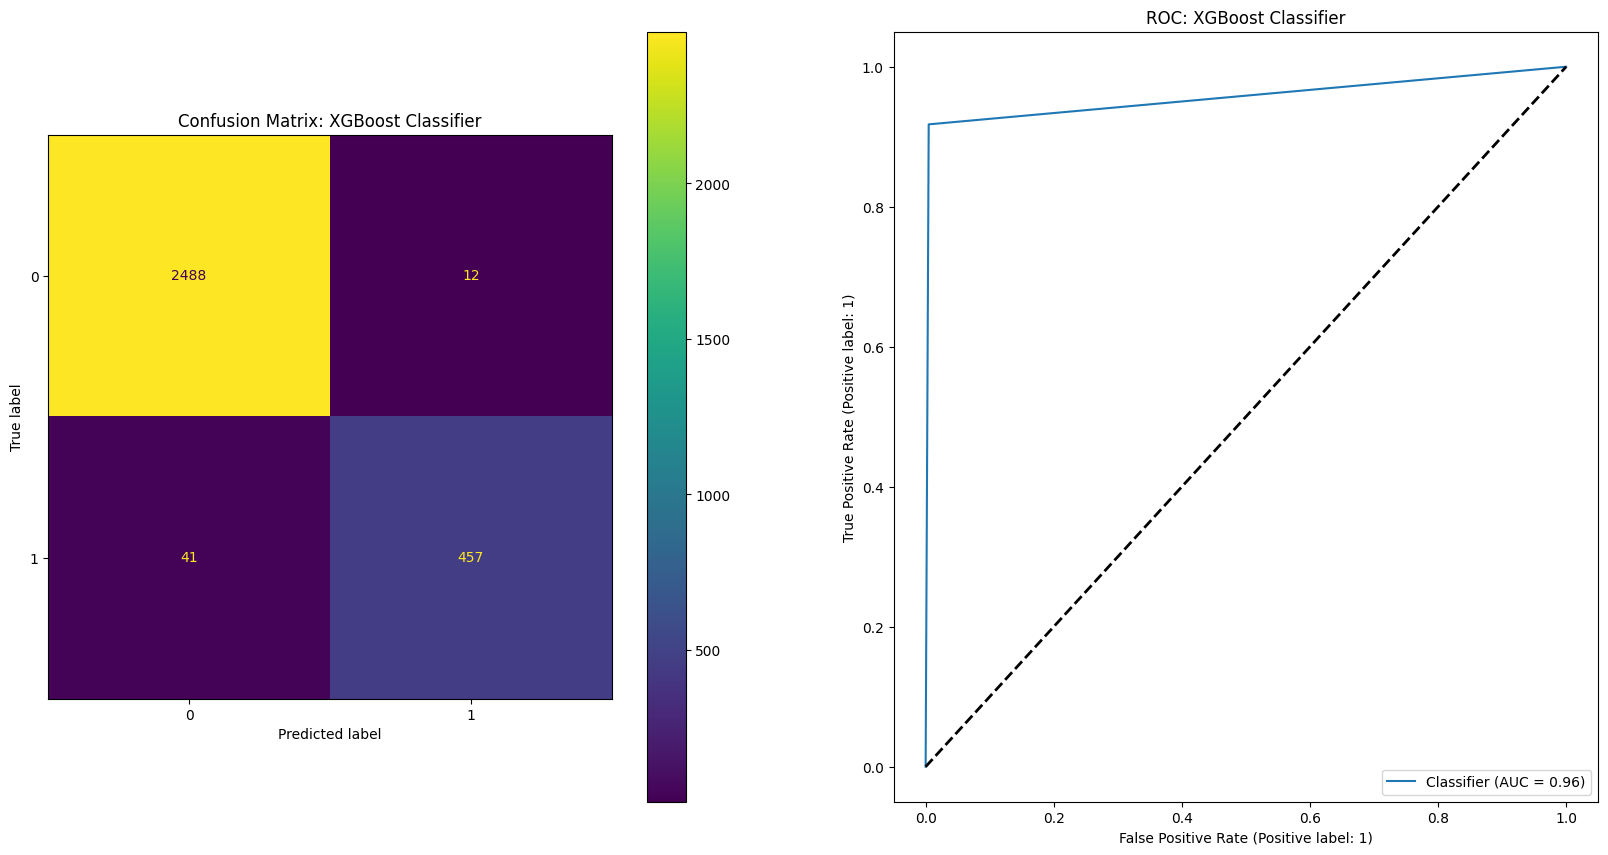

In [44]:
xgb_preds = xgb_cv.predict(x_test)

fig, ax = plt.subplots(1, 2, figsize=(20,10))

cm = metrics.confusion_matrix(y_test, xgb_preds, labels=xgb_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
disp.plot(ax=ax[0])
ax[0].set_title("Confusion Matrix: XGBoost Classifier")

metrics.RocCurveDisplay.from_predictions(y_test, xgb_preds, ax=ax[1])
ax[1].plot([0, 1], [0, 1], 'k--', lw=2)
ax[1].set_title("ROC: XGBoost Classifier")

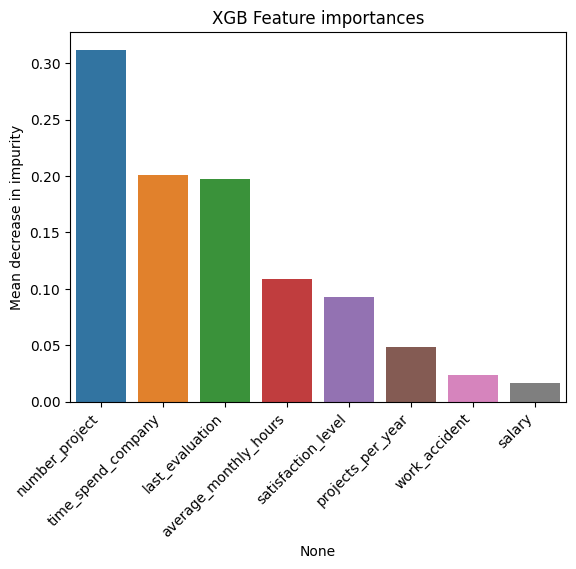

In [45]:
importances = xgb_cv.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=x_test.columns)
xgb_importances = xgb_importances.sort_values(ascending=False)

sns.barplot(x=xgb_importances.index, y=xgb_importances.values, hue=xgb_importances.index, legend=False)
plt.title('XGB Feature importances')
plt.ylabel('Mean decrease in impurity')
plt.xticks(rotation=45, ha="right")
plt.show()

In [46]:
scores_df = dump_metrics(xgb_cv, xgb_cv.predict(x_train), y_train, "XGBoost: Training", scores_df)
scores_df = dump_metrics(xgb_cv, xgb_preds, y_test, "XGBoost: Testing", scores_df)

scores_df

,Name,Precision,Recall,Accuracy,F1
0,Logistic: Training,0.712299,0.651708,0.898477,0.680658
0,Logistic: Testing,0.706278,0.632530,0.895264,0.667373
0,RF: Training,0.999330,0.999330,0.999778,0.999330
0,RF: Testing,0.991304,0.915663,0.984656,0.951983
0,XGBoost: Training,0.984979,0.922304,0.984766,0.952612
0,XGBoost: Testing,0.974414,0.917671,0.982322,0.945191


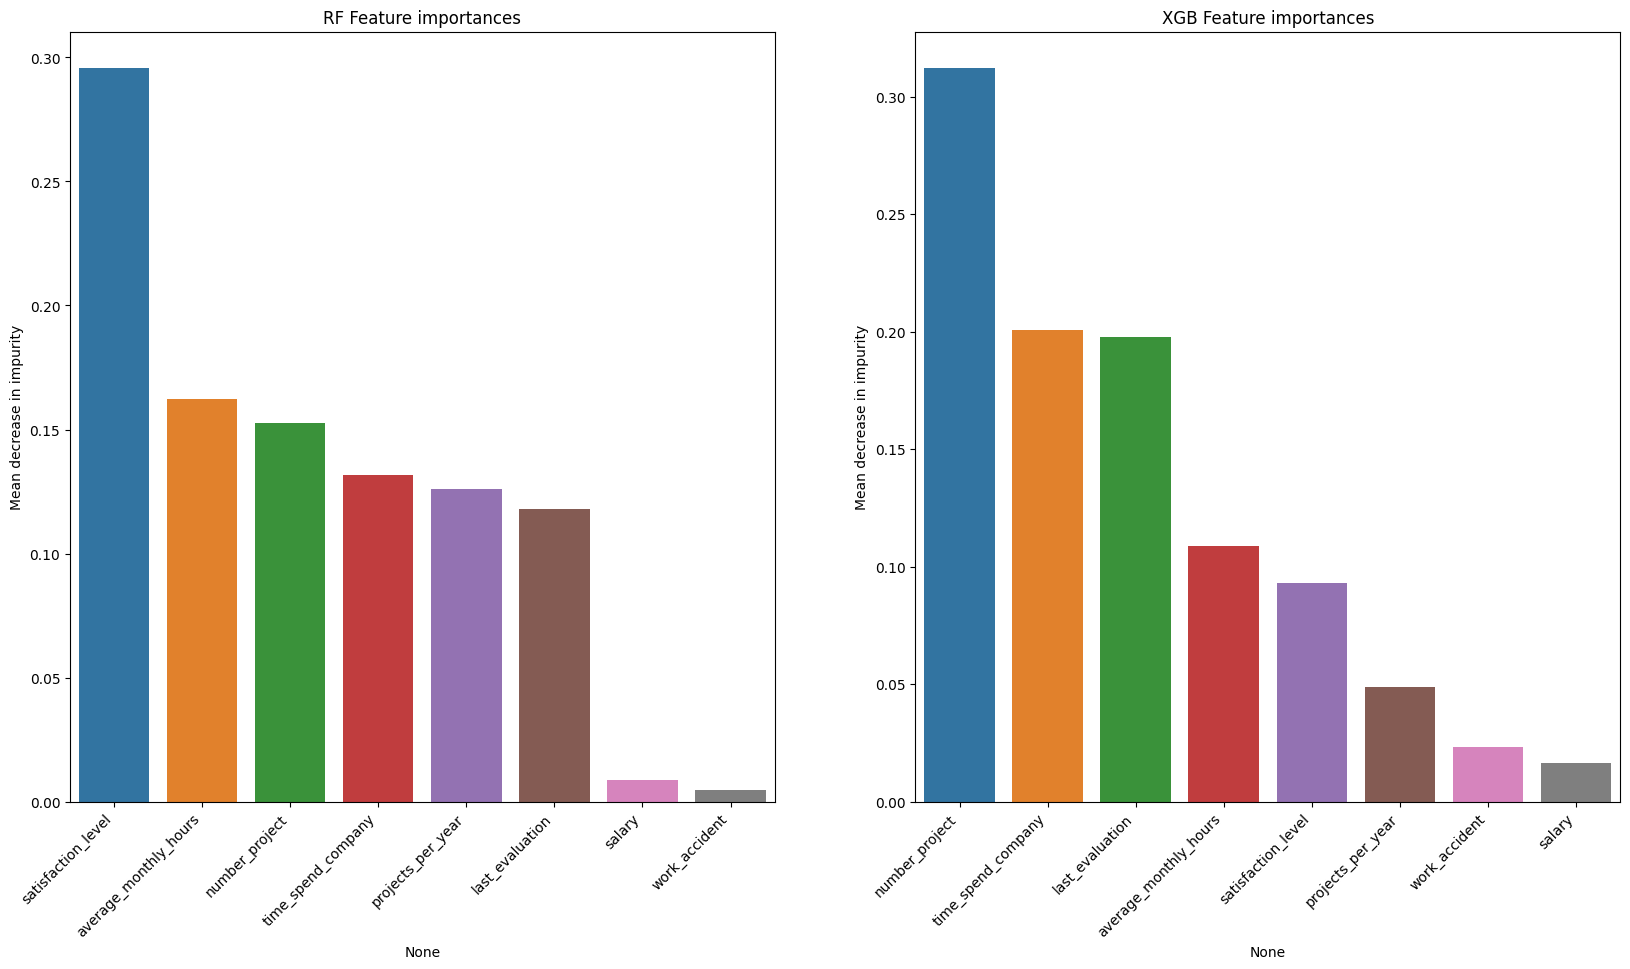

In [47]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=x_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)

sns.barplot(x=rf_importances.index, y=rf_importances.values, hue=rf_importances.index, legend=False, ax=ax[0])
ax[0].set_title('RF Feature importances')
ax[0].set_ylabel('Mean decrease in impurity')
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=45, ha="right")

importances = xgb_cv.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=x_test.columns)
xgb_importances = xgb_importances.sort_values(ascending=False)

sns.barplot(x=xgb_importances.index, y=xgb_importances.values, hue=xgb_importances.index, legend=False, ax=ax[1])
ax[1].set_title('XGB Feature importances')
ax[1].set_ylabel('Mean decrease in impurity')
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(),rotation=45, ha="right")
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
    - ```work_accident``` and ```salary``` seem to be the least predictive of whether employees at this company leave.
    -  ```satisfaction_level``` and ```number_project``` seem to be primary contributors to employees leaving, and all of the other attributes tend to contribute a fair amount except ```work_accident``` and ```salary```.
- What business recommendations do you propose based on the models built?
    - Ensure your employees are satisfied and keep the number of projects each employee has manageable.
    - If an employee is dissasfied, see what concerns they have and alleviate them quickly.
    - Too many projects assigned to one employee seems detrimental to them staying. However many of the employees who left only had 2 projects as well. This could mean that they were assigned a second project too quickly, or that they didnt like one of their projects in some way and didnt want the second project.
- What potential recommendations would you make to your manager/company?
    - Host periodic surveys on employee satisfaction to catch a problem early.
    - Re-evaluate how the company assigns projects to which people, or what sorts of projects are assigned. 
- Do you think your model could be improved? Why or why not? How?
    - The model seems to perform very well already with above 95% accuracy on test data (and with comparable F1 scores besides). The hyperparameter search was also fairly thorough.
    - I am still concerned about the fact that the number of people who left only made up ```16.6%``` of the data and the models could still be at risk of overfitting. 
- Given what you know about the data and the models you were using, what other questions could you address for the team?
   - Many of the employees who left only had 2 projects. Is there any relationship between the projects these employees were assigned?
   - The majority of employees seem to work a lot, working more than the average business hours in a month. Do employees burnout and if so, are they leaving because of this burnout?
   - Is there a relationship between the exact time the employees decided to leave and the rest of the variables? (for example do employees leave or stay if they've had a recent work accident?)
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
    - Pandas/sklearn docs 
- Do you have any ethical considerations in this stage?
    - Because these models were trained on a presumption of certain attributes being worthwhile to research, there is a researcher's bias baked into these models. Additionally, I have not been given anymore data than I have, which means if an employee leaves because of a reason that is not listed here, the model can not be used to accurately predict this employee's decision.
    - Each employee should be evaluated individually on a case by case basis, and the model probably shouldn't be used in an attempt to "describe" the problems of an employee
    - The "description" of an employee gained from this model, while it could possibly be used to proactively resolve employee problems in certain simple circumstances, should be used very carefully and probably only for the simplest cases or else employees will feel as if they are perpetually being tracked and monitored, which is probably not conducive to morale. 



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

- The Random Forest classifier evaluated the best amongst all classifiers. However, the ```4%```ish drop in ```F1``` from training to testing accuracy might be indicative of an overfit problem. The RF tests comparably to the XGBoost model, however, and the XGBoost model doesn't have this drop in performance between training and testing. The logistic model performed rather poorly.

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

- Host periodic surveys to track employee satisfaction level, this seems to be a primary indicator of whether an employee leaves.
- Check up on employee work-life balances, whether due to project overburdening or high average work hours.
- HR might want to setup a private concerns hotline to help resolve problems before it results in employees leaving.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.